In [91]:
import pandas as pd
import sys
import os

BASEPATH = {
    'darwin': '/Users/patrick/Dropbox/datascienceud/vis',
    'linux': '/home/patrick/Dropbox/datascienceud/vis',
}
basepath = BASEPATH.get(sys.platform)

csvfilename = os.path.join(basepath, 'fligth_delay_cause_monthly_2003_2017.csv')
airportscsv = os.path.join(basepath, 'master_airports.csv')

delays = pd.read_csv(csvfilename)
delays.columns = [col.strip() for col in delays.columns]

airports = pd.read_csv(airportscsv)
airports.columns = [c.lower() for c in airports.columns]

c = lambda v: v.split(',')
# get unique data
airports = airports.drop_duplicates(c('airport'))
assert len(airports.groupby('airport').filter(lambda v: len(v) > 1)) == 0, "there are duplicates"
airports.columns

flights_arrival = delays.merge(airports[c('airport,display_airport_name,airport_state_code,airport_state_fips')], on=c('airport'))
flights_arrival.rename(columns=dict(airport_state_fips='fips',
                                    airport_state_code='state'), inplace=True)
flights_arrival['fips'] = flights_arrival.fips.dropna().apply(lambda v: 'US{:02d}'.format(int(v)))
flights_arrival = flights_arrival.groupby(c('state,fips,year')).arr_flights.sum().unstack()
flights_arrival.fillna(0, inplace=True)
flights_arrival.to_csv('data/airport_flights.csv')

delays = delays.merge(airports[c('airport,airport_state_code,airport_state_fips')], on=c('airport'), how='left')
delays['arr_del15_pct'] = delays.arr_del15 / delays.arr_flights

delays.rename(columns=dict(airport_state_fips='fips',
                           airport_state_code='state'), inplace=True)
delays['fips'] = delays.fips.dropna().apply(lambda v: 'US{:02d}'.format(int(v)))

# calculate percentage of flights per cause
for ctcol in [col for col in delays.columns if col.endswith('_ct')]:
    delays['{}_pct'.format(ctcol)] = delays[ctcol] / delays['arr_del15']
    
# average delay
delays['arr_del15_avg'] = delays.arr_delay / delays.arr_flights

In [11]:
delays.columns

Index([u'year', u'month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u'weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u'arr_delay', u'carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay', u'airport_state_code', u'airport_state_fips',
       u'arr_del15_pct', u'carrier_ct_pct', u'weather_ct_pct', u'nas_ct_pct',
       u'security_ct_pct', u'late_aircraft_ct_pct'],
      dtype='object')

In [56]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_del15_pct',
       'carrier_ct_pct', 'weather_ct_pct', 'nas_ct_pct', 'security_ct_pct',
       'late_aircraft_ct_pct', 'airport_state_code', 'airport_state_fips'],
      dtype='object')

In [7]:
top10_carriers_flights = delays.groupby('carrier').arr_flights.sum().nlargest(10)
top10_carriers_delays = delays.groupby('carrier').arr_del15.mean().nlargest(10)
top10_carriers_weather = delays.groupby('carrier').weather_delay.mean().nlargest(10)
top10_carriers_carrier = delays.groupby('carrier').carrier_delay.mean().nlargest(10)
top10_carriers_security = delays.groupby('carrier').security_delay.mean().nlargest(10)
top10_carriers_diverted = delays.groupby('carrier').arr_diverted.sum().nlargest(10)
top10_carriers_late_aircraft = delays.groupby('carrier').late_aircraft_delay.mean().nlargest(10)
top10s_carriers = [v for v in locals() if v.startswith('top10_carriers')]
for top in top10s_carriers:
    locals()[top].to_csv('data/{}.csv'.format(top))

In [8]:
top10_airports_flights = delays.groupby('airport').arr_flights.sum().nlargest(10)
top10_airports_delays = delays.groupby('airport').arr_del15.mean().nlargest(10)
top10_airports_weather = delays.groupby('airport').weather_delay.mean().nlargest(10)
top10_airports_carrier = delays.groupby('airport').carrier_delay.mean().nlargest(10)
top10_airports_security = delays.groupby('airport').security_delay.mean().nlargest(10)
top10_airports_diverted = delays.groupby('airport').arr_diverted.sum().nlargest(10)
top10_airports_late_aircraft = delays.groupby('airport').late_aircraft_delay.mean().nlargest(10)
top10s_airports = [v for v in locals() if v.startswith('top10_airports')]
for top in top10s_airports:
    dfx = locals()[top]
    if hasattr(dfx, 'to_csv'):
        dfx.to_csv('data/{}.csv'.format(top))

In [9]:
top10s_carriers
top10s_airports

['top10_airports_delays',
 'top10_airports_carrier',
 'top10_airports_late_aircraft',
 'top10_airports_diverted',
 'top10_airports_weather',
 'top10_airports_security',
 'top10_airports_flights']

In [17]:
top10_carriers_flights

carrier
WN    15909605.0
DL     9431269.0
AA     8853214.0
OO     7931853.0
UA     6600484.0
EV     5896806.0
MQ     5771809.0
US     5188612.0
NW     2767549.0
B6     2764963.0
Name: arr_flights, dtype: float64

**open /usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/IPython/core/interactiveshell.py
**open /usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/generic.py


AttributeError: 'DataFrame' object has no attribute 'fips'

In [104]:
flights_arrival.fillna(0)

airport      2003      2004      2005      2006      2007      2008  \
0       ABE    2293.0    6886.0    4640.0    5129.0    5700.0    4795.0   
1       ABI    1564.0    3087.0    2745.0    2847.0    2838.0    2661.0   
2       ABQ   21686.0   37037.0   36950.0   37263.0   41163.0   41144.0   
3       ABR       0.0       0.0       0.0       0.0       0.0       0.0   
4       ABY     850.0    1438.0    1314.0    1363.0    1309.0    1095.0   
5       ACK     193.0     242.0     227.0     235.0     319.0     469.0   
6       ACT    1815.0    3518.0    2943.0    2453.0    2347.0    1994.0   
7       ACV    2220.0    4060.0    3978.0    3644.0    3848.0    3702.0   
8       ACY      81.0    1096.0    1032.0     761.0     716.0     113.0   
9       ADK      59.0     104.0     102.0     104.0     103.0     102.0   
10      ADQ     424.0     727.0     665.0     602.0     691.0     706.0   
11      AEX    1845.0    3297.0    2602.0    2767.0    2988.0    2327.0   
12      AGS    2619.0    3939.0    2682.0    2315.0    2279.0    2406.0   
13      AKN     250.0     385.0     389.0     364.0     235.0     116.0   
14      ALB    9829.0   18067.0   18357.0   14726.0   14979.0   13468.0   
15      ALO       0.0       0.0       0.0       0.0     302.0     323.0   
16      AMA    4762.0    8130.0    8242.0    8492.0    7543.0    7490.0   
17      ANC   13564.0   20544.0   20766.0   19979.0   19749.0   19329.0   
18      APF       0.0     127.0     997.0     740.0     554.0       0.0   
19      APN       0.0       0.0       0.0       0.0       0.0       0.0   
20      ART       0.0       0.0       0.0       0.0       0.0       0.0   
21      ASE       0.0       0.0       0.0    3716.0    5250.0    5243.0   
22      ATL  215951.0  416989.0  429800.0  404829.0  413867.0  414521.0   
23      ATW     485.0    2605.0    2472.0    4260.0    6188.0    5872.0   
24      AUS   24154.0   39875.0   41744.0   44649.0   51596.0   49637.0   
25      AVL    2285.0    4306.0    4506.0    3101.0    3773.0    4398.0   
26      AVP     428.0    3153.0    2658.0    2571.0    2934.0    2384.0   
27      AZA       0.0       0.0       0.0       0.0       0.0       0.0   
28      AZO    2018.0    4809.0    4439.0    4767.0    5108.0    3921.0   
29      BDL   19478.0   34558.0   37255.0   32883.0   32634.0   29445.0   
..      ...       ...       ...       ...       ...       ...       ...   
352     SWF     792.0    3166.0    3009.0    1117.0    5591.0    4245.0   
353     SYR    7165.0   15171.0   14499.0   12383.0   13276.0   12036.0   
354     TEX       0.0       0.0       0.0     273.0     216.0     194.0   
355     TKI       0.0       0.0       0.0       0.0       0.0       0.0   
356     TLH    2080.0    5484.0    5349.0    3194.0    4226.0    5913.0   
357     TOL    2371.0    5555.0    5336.0    3615.0    2099.0    1476.0   
358     TPA   38451.0   71811.0   79518.0   75953.0   79799.0   78171.0   
359     TRI    1763.0    3962.0    3733.0    1458.0    1200.0    2116.0   
360     TTN       0.0       0.0       0.0      51.0     805.0       0.0   
361     TUL   12388.0   21491.0   22041.0   21751.0   25186.0   23455.0   
362     TUP       0.0       0.0     637.0     733.0     604.0       9.0   
363     TUS   10065.0   17932.0   19604.0   25033.0   28184.0   26678.0   
364     TVC    1569.0    2987.0    2930.0    3794.0    4135.0    4258.0   
365     TWF    1196.0    2096.0    2340.0    2138.0    2155.0    1788.0   
366     TXK     887.0    1996.0    1389.0    1094.0    1208.0    1247.0   
367     TYR    1850.0    3590.0    3158.0    1734.0    1600.0    1585.0   
368     TYS    6541.0   13753.0   13945.0    9989.0   13970.0   13999.0   
369     UST       0.0       0.0       0.0       0.0       0.0       0.0   
370     UTM       0.0       0.0       0.0       0.0       0.0       0.0   
371     VCT     538.0    1022.0     516.0       0.0       0.0       0.0   
372     VEL       0.0       0.0       0.0       0.0       0.0       0.0   
373     VIS     416.0     667

In [5]:
c = lambda v : v.split(',')
pd.pivot_table(delays, index=c('year,month,carrier,carrier_name,airport,airport_name'))
mdelays = pd.melt(delays, id_vars=c('year,month,carrier,carrier_name,airport,airport_name'))

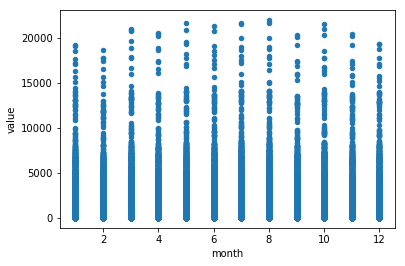

In [6]:
%matplotlib inline
mdelays[mdelays.variable == 'arr_flights'].sort_values('month').plot.scatter('month', 'value')

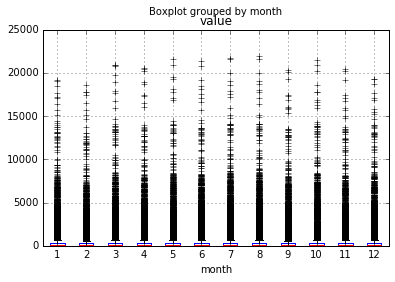

In [143]:
mdelays[mdelays.variable == 'arr_flights'].sort_values('month').boxplot('value', by='month')

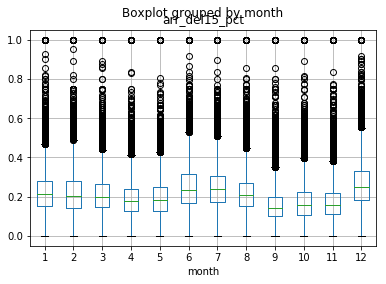

In [51]:

delays.boxplot('arr_del15_pct', by='month')

In [15]:
from  matplotlib import pyplot as plt 

c = lambda v: v.split(',')
top10_airports = delays.groupby('airport').arr_flights.count().sort_values(ascending=False).index[0:3]
trend = delays[delays.airport.isin(top10_airports)].groupby(c('year,airport')).arr_del15_pct.mean()
trend = trend.reset_index()

fig, ax = plt.subplots(1, 1)
for g, gdf in trend.groupby('airport'):
    gdf.plot.line('year', 'arr_del15_pct', ax=ax)

In [45]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'weather_ctpct'],
      dtype='object')

groupby: airport, month, cause
select: airport, year
select: year (simulate one by one)

count variables => normalize to 1
delay varaibles => normalize to 1
=> then use to show stack graph. or donuts or something


maybe simple bubbles with year animation. http://d3plus.org/examples/basic/b197f489fb0fc2093fee/
geomap http://d3plus.org/examples/advanced/9943042/
stacked area chart: http://d3plus.org/examples/advanced/9943413/

In [8]:
delays['weather_ctpct'] = delays.weather_ct / delays.arr_del15
delays[['year', 'month', 'carrier', 'airport', 'arr_flights', 'weather_ctpct']].sort_values(['arr_flights', 'weather_ctpct'], ascending=False).head(10)

year  month carrier airport  arr_flights  weather_ctpct
215214  2016      8      DL     ATL      21977.0       0.026946
214185  2016      7      DL     ATL      21681.0       0.050012
202634  2015      8      DL     ATL      21648.0       0.044065
212141  2016      5      DL     ATL      21623.0       0.038635
201550  2015      7      DL     ATL      21589.0       0.046470
217267  2016     10      DL     ATL      21546.0       0.024408
213155  2016      6      DL     ATL      21386.0       0.036056
204819  2015     10      DL     ATL      20977.0       0.016820
196907  2015      3      DL     ATL      20957.0       0.038834
222383  2017      3      DL     ATL      20893.0       0.043879

In [6]:
delays.head()

year  month carrier            carrier_name airport  \
0  2003      6      AA  American Airlines Inc.     ABQ   
1  2003      6      AA  American Airlines Inc.     ANC   
2  2003      6      AA  American Airlines Inc.     ATL   
3  2003      6      AA  American Airlines Inc.     AUS   
4  2003      6      AA  American Airlines Inc.     BDL   

                                        airport_name  arr_flights  arr_del15  \
0  Albuquerque, NM: Albuquerque International Sun...        307.0       56.0   
1  Anchorage, AK: Ted Stevens Anchorage Internati...         90.0       27.0   
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...        752.0      186.0   
3       Austin, TX: Austin - Bergstrom International        842.0      174.0   
4                Hartford, CT: Bradley International        383.0       55.0   

   carrier_ct  weather_ct         ...          arr_cancelled  arr_diverted  \
0       14.68       10.79         ...                    1.0           1.0   
1        7.09        2.00         ...                    0.0           0.0   
2       33.99       27.82         ...                    5.0           0.0   
3       60.24       20.54         ...                    9.0           1.0   
4       14.90        8.91         ...                    0.0           0.0   

   arr_delay  carrier_delay  weather_delay  nas_delay  security_delay  \
0     2530.0          510.0          621.0      676.0            25.0   
1     1390.0          271.0           83.0      581.0             0.0   
2     8314.0         1367.0         1722.0     3817.0           139.0   
3     8344.0         3040.0         1032.0     1835.0           115.0   
4     3137.0          815.0          574.0      555.0             0.0   

   late_aircraft_delay  airport_state_code  airport_state_fips  
0                698.0                  NM                35.0  
1                455.0                  AK                 2.0  
2               1269.0                  GA                13.0  
3               2322.0                  TX                48.0  
4               1193.0                  CT                 9.0  

[5 rows x 23 columns]

In [16]:
dfx = delays.groupby(['airport']).weather_ctpct.agg('mean')
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'weather_ctpct'],
      dtype='object')

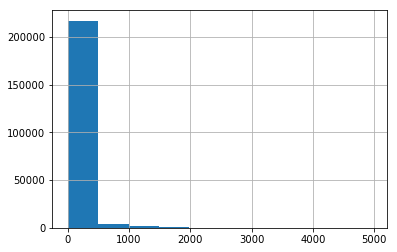

In [19]:
%matplotlib inline
delays[delays.arr_del15 < 5000 ].arr_del15.hist()

In [18]:
len(delays)

224224

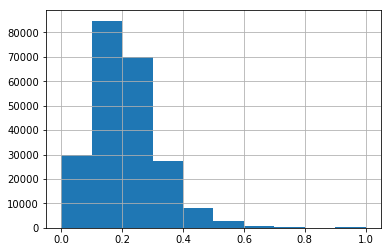

In [10]:
%matplotlib inline
delays.arr_del15_pct.hist()

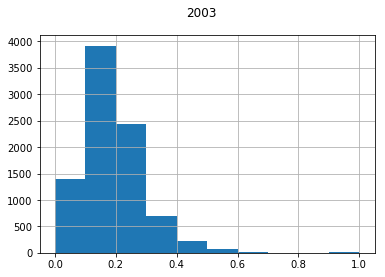

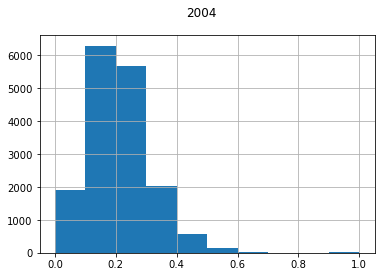

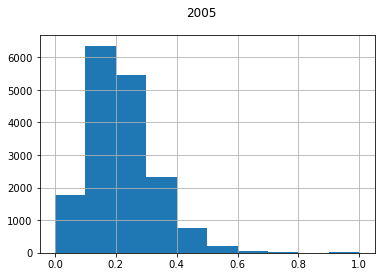

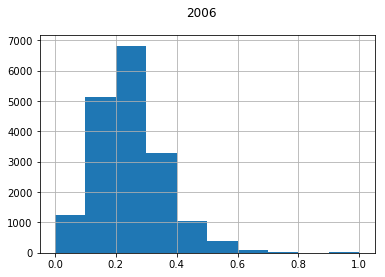

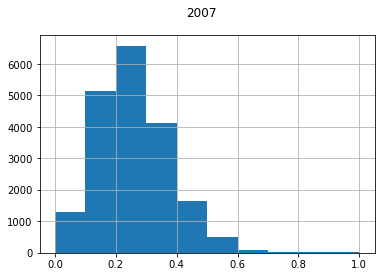

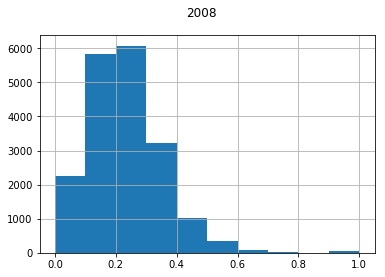

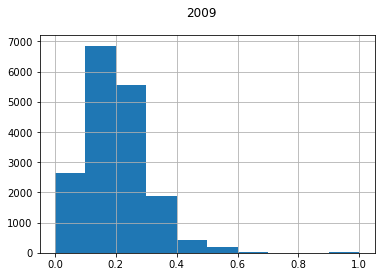

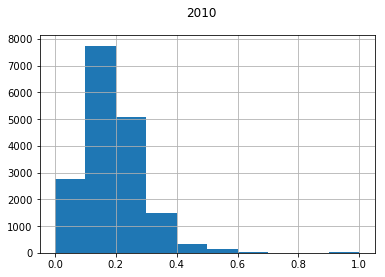

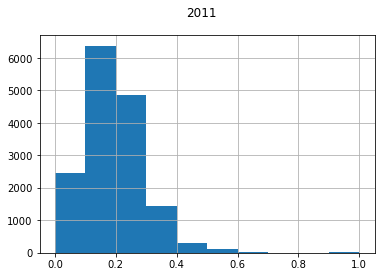

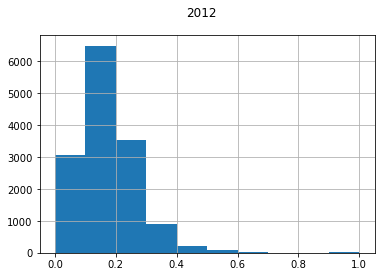

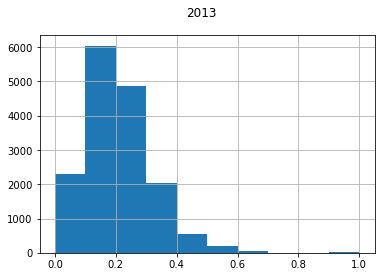

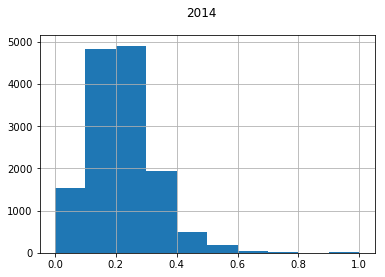

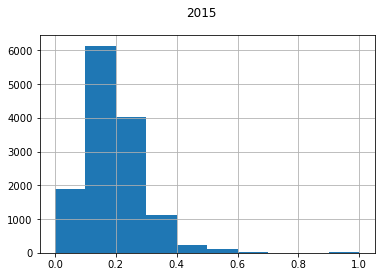

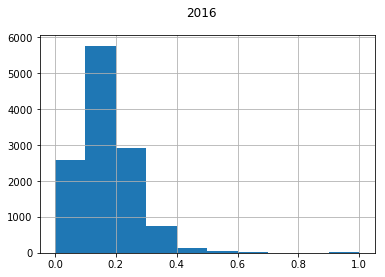

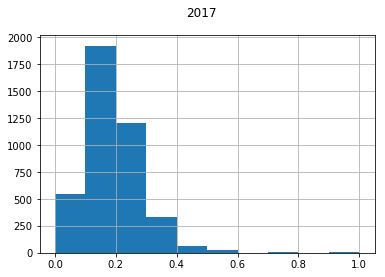

In [25]:
from matplotlib import pyplot as plt

for g, gdf in delays.groupby('year'):
    gdf[gdf.arr_del15_pct >=0.].arr_del15_pct.hist()
    plt.suptitle(g)
    plt.figure()

In [122]:
delays.columns

Index([u'year', u'month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u'weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u'arr_delay', u'carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay', u'state', u'fips', u'arr_del15_pct',
       u'carrier_ct_pct', u'weather_ct_pct', u'nas_ct_pct', u'security_ct_pct',
       u'late_aircraft_ct_pct', u'arr_del15_avg'],
      dtype='object')

In [199]:
delays.groupby(c('airport_name')).arr_del15_pct.mean().nlargest(20)
dfx = delays.groupby(c('year,airport')).arr_flights.sum().reset_index()
dfx = dfx.groupby('year').apply(lambda v: v.nlargest(10, 'arr_flights')[c('airport,arr_flights')]).reset_index()
delays.groupby(c('airport_name'))

year  level_1 airport  arr_flights
0    2003      199     ORD     217191.0
1    2003       16     ATL     215951.0
2    2003       77     DFW     196508.0
3    2003      148     LAX     131898.0
4    2003      128     IAH     111526.0
5    2003      208     PHX      98440.0
6    2003       92     EWR      89326.0
7    2003       76     DEN      86401.0
8    2003      146     LAS      85255.0
9    2003      189     MSP      84966.0
10   2004      298     ATL     416989.0
11   2004      485     ORD     376206.0
12   2004      359     DFW     344022.0
13   2004      433     LAX     232732.0
14   2004      352     CVG     207937.0
15   2004      413     IAH     202096.0
16   2004      494     PHX     170236.0
17   2004      431     LAS     158157.0
18   2004      374     EWR     158137.0
19   2004      358     DEN     155202.0
20   2005      586     ATL     429800.0
21   2005      773     ORD     337742.0
22   2005      648     DFW     307811.0
23   2005      722     LAX     230980.0
24   2005      701     IAH     212082.0
25   2005      639     CVG     208428.0
26   2005      647     DEN     182917.0
27   2005      782     PHX     174501.0
28   2005      720     LAS     167557.0
29   2005      825     SLC     160822.0
..    ...      ...     ...          ...
120  2015     3651     ATL     379498.0
121  2015     3859     ORD     313514.0
122  2015     3717     DFW     260615.0
123  2015     3716     DEN     214135.0
124  2015     3807     LAX     212435.0
125  2015     3909     SFO     162136.0
126  2015     3782     IAH     159910.0
127  2015     3870     PHX     159744.0
128  2015     3805     LAS     145900.0
129  2015     3847     MSP     122751.0
130  2016     3972     ATL     384252.0
131  2016     4175     ORD     243889.0
132  2016     4032     DEN     226225.0
133  2016     4123     LAX     212972.0
134  2016     4033     DFW     196031.0
135  2016     4225     SFO     172398.0
136  2016     4187     PHX     159164.0
137  2016     4121     LAS     150690.0
138  2016     4099     IAH     137092.0
139  2016     4224     SEA     132627.0
140  2017     4284     ATL     121290.0
141  2017     4481     ORD      79959.0
142  2017     4344     DEN      68957.0
143  2017     4430     LAX      68403.0
144  2017     4345     DFW      58774.0
145  2017     4531     SFO      52951.0
146  2017     4493     PHX      52798.0
147  2017     4428     LAS      48987.0
148  2017     4447     MCO      44967.0
149  2017     4406     IAH      42820.0

[150 rows x 4 columns]

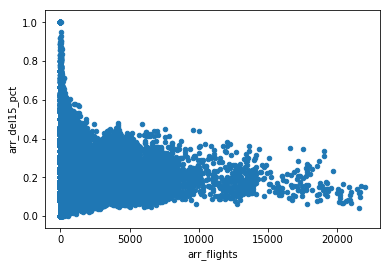

In [27]:
delays.plot('arr_flights', 'arr_del15_pct', kind='scatter')

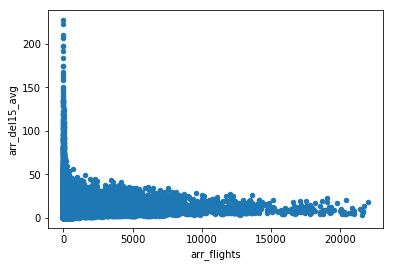

In [21]:
delays['arr_del15_avg'] = delays.arr_delay / delays.arr_flights
delays[delays.arr_del15_avg < 250].plot('arr_flights', 'arr_del15_avg', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964dfb9be0>]], dtype=object)

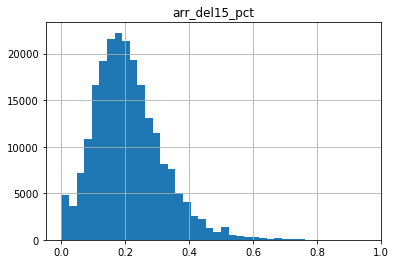

In [78]:
delays[delays.arr_del15_pct < 1].hist('arr_del15_pct', bins=40)

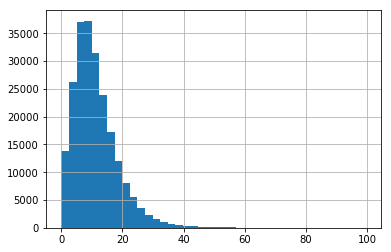

In [30]:
delays[delays.arr_del15_avg < 100].arr_del15_avg.hist(bins=40)

In [54]:
print(delays.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_del15_pct',
       'carrier_ct_pct', 'weather_ct_pct', 'nas_ct_pct', 'security_ct_pct',
       'late_aircraft_ct_pct'],
      dtype='object')


In [197]:
s = bytearray('hallo', encoding='utf-8')
s[2:3] = [ord('Z'), ord('X')]
"".join(map(chr, s))

class mstr(bytearray):
    """ 
    mutable string 
    
    string that supports index assignments, otherwise behaves 
    like a str object. Note that all methods except for str,
    __repr__, __iter__ and __setitem__ are delegated to the
    str object.
    """
    def __init__(self, s):
        return super(mstr, self).__init__(s, encoding='utf-8')
    def str(self):
        return "".join(map(chr, s))
    def __repr__(self):
        return self.str()
    def __setitem__(self, i, v):
        super(mstr, self).__setitem__(i, map(ord, v))
    def __iter__(self):
        for v in super(mstr, self).__iter__():
            yield chr(v)
    def __getattribute__(self, a):
        if a in ['str', '__repr__', '__setitem__', '__iter__']:
            return super(mstr, self).__getattribute__(a)
        s = getattr(self, 'str')()
        return getattr(s, a)
       
    
    
m =mstr('hallo')
m[2:3] = '5xasdf'
m.upper()
print(','.join(m))
m.replace('h', 'x')
m += 'hallo'    

h,a,5,x,a,s,d,f,l,o


TypeError: can't concat str to mstr

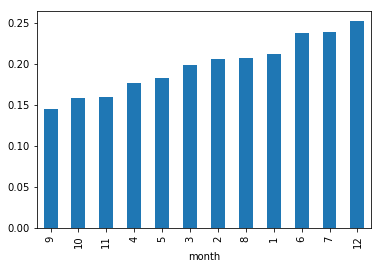

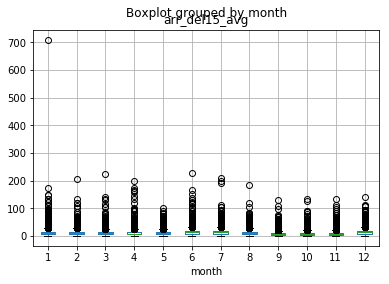

In [102]:

delays.groupby('month').arr_del15_pct.median().sort_values().plot(kind='bar')
delays.boxplot('arr_del15_avg', 'month')

In [58]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_del15_pct',
       'carrier_ct_pct', 'weather_ct_pct', 'nas_ct_pct', 'security_ct_pct',
       'late_aircraft_ct_pct', 'airport_state_code', 'airport_state_fips'],
      dtype='object')

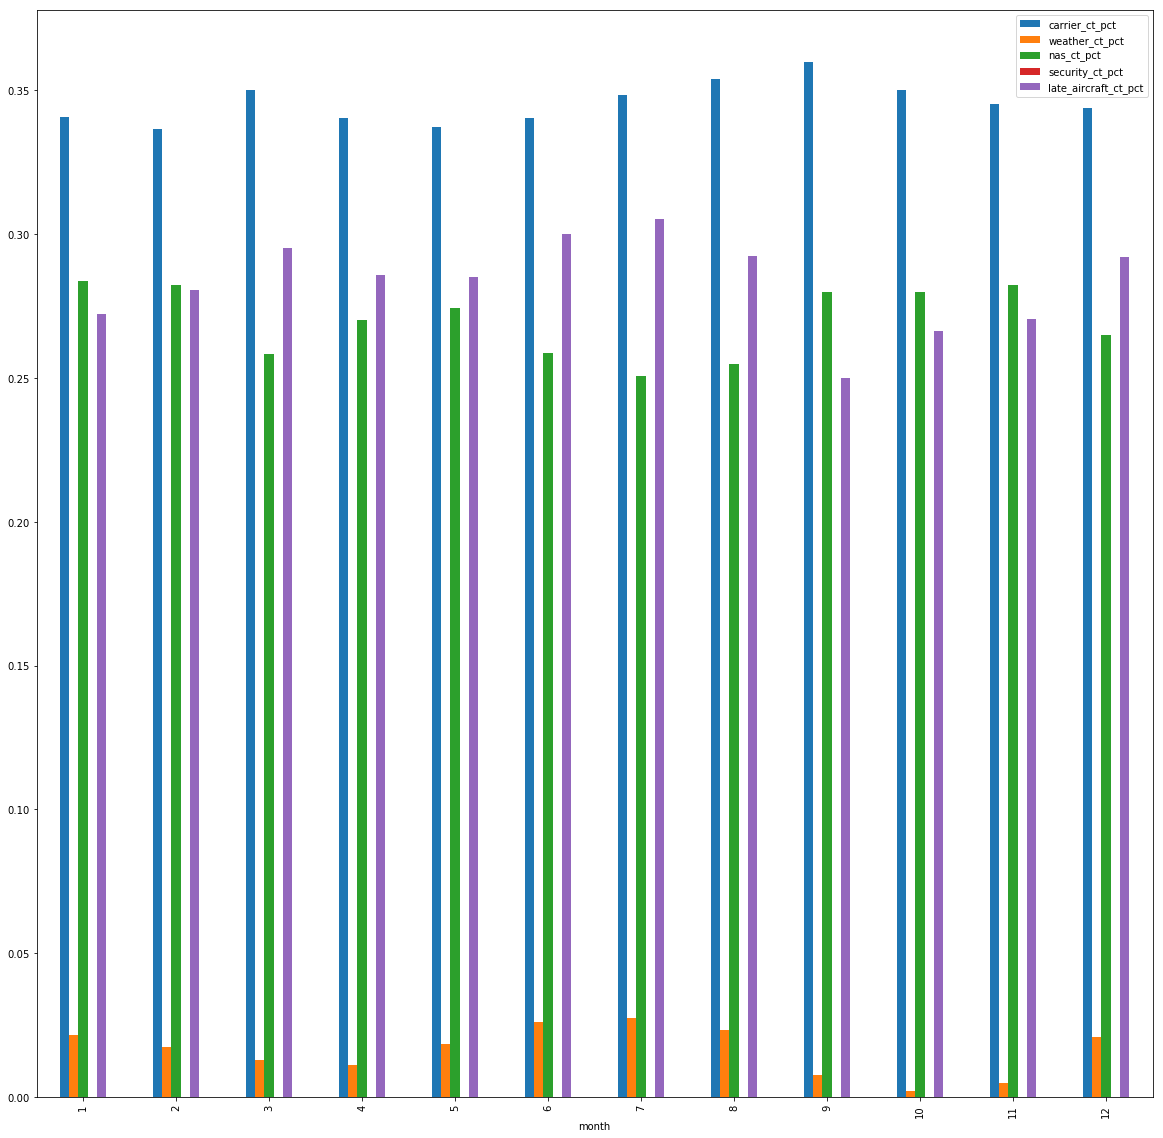

In [63]:
def plot_cause(group):
    ctpctcols = [col for col in delays.columns if col.endswith('_ct_pct')]
    dfx = delays[[group] + ctpctcols].groupby(group).median().reset_index()
    dfx.plot.bar(group, figsize=(20,20))
plot_cause('month')

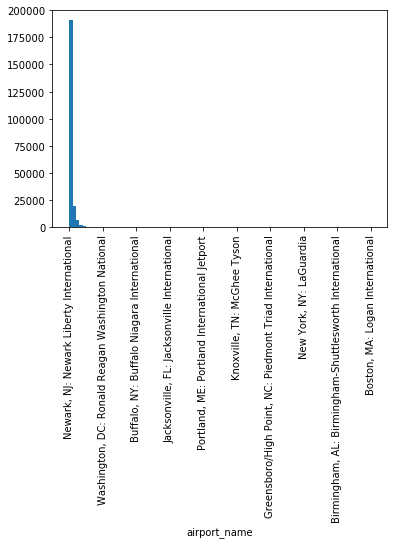

In [78]:
delays['weather_ct_pct'].hist()
delays[delays['weather_ct_pct'] > .2].groupby('airport_name').airport.count().nlargest(10).plot.bar()

In [95]:
delays.groupby(['airport_name', 'month']).weather_ct_pct.median().nlargest(10)

airport_name                                              month
Moab, UT: Canyonlands Field                               2        0.945000
Hickory, NC: Hickory Regional                             4        0.780000
Staunton, VA: Shenandoah Valley Regional                  12       0.570000
Moses Lake, WA: Grant County International                11       0.500000
Hickory, NC: Hickory Regional                             1        0.482500
Unalaska, AK: Unalaska Airport                            9        0.422857
Watertown, NY: Watertown International                    1        0.405625
New Haven, CT: Tweed New Haven                            12       0.358295
Kinston, NC: Kinston Regional Jetport at Stallings Field  6        0.354737
Naples, FL: Naples Municipal                              10       0.347667
Name: weather_ct_pct, dtype: float64

In [102]:
delays.groupby(['airport_name']).weather_ct_pct.median().nlargest(10)

airport_name
Hickory, NC: Hickory Regional                               0.226085
Unalaska, AK: Unalaska Airport                              0.217773
Naples, FL: Naples Municipal                                0.210000
Kinston, NC: Kinston Regional Jetport at Stallings Field    0.209696
New Haven, CT: Tweed New Haven                              0.201365
Tupelo, MS: Tupelo Regional                                 0.166522
Macon, GA: Middle Georgia Regional                          0.164118
Kodiak, AK: Kodiak Airport                                  0.121429
Hilton Head, SC: Hilton Head Airport                        0.112340
Killeen, TX: Skylark Field                                  0.095312
Name: weather_ct_pct, dtype: float64

In [261]:
# delays per some group (carrier, airport), as a percentage of total delay in year
total_delays = delays.groupby(['year', 'airport']).arr_delay.sum()
dfx = total_delays.groupby(level=0).apply(lambda x: x / float(x.sum())).groupby(level=0).apply(lambda g: g.nlargest(5)).unstack()
dfx.index.names = ['y1', 'year']
dfx.reset_index()

airport    y1  year       ATL       DEN       DFW       EWR       IAH  \
0        2003  2003  0.063641       NaN  0.045230  0.045029       NaN   
1        2004  2004  0.075271       NaN  0.044313  0.036070       NaN   
2        2005  2005  0.084472       NaN  0.036612  0.043504       NaN   
3        2006  2006  0.068446       NaN  0.036416  0.042842  0.029425   
4        2007  2007  0.056024  0.028460  0.043142  0.040829       NaN   
5        2008  2008  0.064268  0.029238  0.037721  0.040520       NaN   
6        2009  2009  0.092717  0.032281  0.044306  0.042579       NaN   
7        2010  2010  0.078803  0.028944  0.038284       NaN       NaN   
8        2011  2011  0.066865       NaN  0.036844  0.034073       NaN   
9        2012  2012  0.058673       NaN  0.046147  0.037360       NaN   
10       2013  2013  0.060700  0.037910  0.047246       NaN       NaN   
11       2014  2014  0.053791  0.040155  0.055290       NaN       NaN   
12       2015  2015  0.057659  0.039012  0.051992       NaN       NaN   
13       2016  2016  0.060962       NaN  0.043116       NaN       NaN   
14       2017  2017  0.066817       NaN       NaN  0.036027       NaN   

airport       LAX       LGA       ORD       SFO  
0        0.027752       NaN  0.094434       NaN  
1        0.025258       NaN  0.088441       NaN  
2             NaN  0.028009  0.060337       NaN  
3             NaN       NaN  0.083974       NaN  
4             NaN       NaN  0.075617       NaN  
5             NaN       NaN  0.080191       NaN  
6             NaN       NaN  0.055042       NaN  
7             NaN       NaN  0.060795  0.038456  
8             NaN       NaN  0.070905  0.038962  
9             NaN       NaN  0.066106  0.057075  
10            NaN       NaN  0.068218  0.038818  
11            NaN       NaN  0.071596  0.041749  
12       0.040000       NaN  0.068319       NaN  
13       0.045234       NaN  0.053890  0.048469  
14       0.056507       NaN  0.047328  0.063220

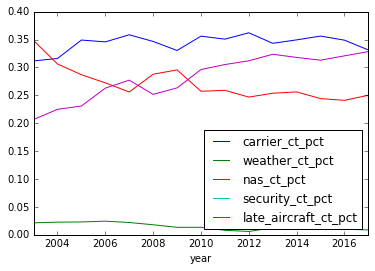

In [29]:
%matplotlib inline

groupcol = ['year']
ctpctcols = [col for col in delays.columns if col.endswith('_ct_pct')]
dfx = delays[groupcol + ctpctcols].groupby(groupcol).median()
dfx.plot(by=groupcol)
dfx.reset_index().to_csv('data/delays_cause_year.csv')
dfx = dfx.reset_index()
dfx = dfx.melt(id_vars=['year'], var_name='name')
dfx.to_csv('data/delays_cause_year.csv')

In [19]:
dfx.columns

Index([u'carrier_ct_pct', u'weather_ct_pct', u'nas_ct_pct', u'security_ct_pct',
       u'late_aircraft_ct_pct'],
      dtype='object')

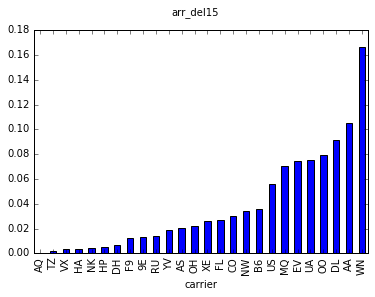

In [44]:
import numpy as np
from matplotlib import pyplot as plt 

for v in ['arr_del15', 'carrier_ct_pct', 'nas_ct_pct', 'late_aircraft_ct_pct']:
    plt.figure()
    plt.suptitle(v)
    total = delays[v].sum()
    causeby = delays.groupby(['carrier']).agg({v: lambda v: v.sum() / total})
    #causeby = causeby.nlargest(10, v)
    causeby = causeby[v].sort_values()
    causeby.plot.bar()
    break
dfx = causeby.reset_index().sort_values('arr_del15').to_csv('data/causeby_carrier.csv')

In [ ]:
delays.arr_del15_pct

In [264]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'arr_del15_pct',
       'carrier_ct_pct', 'weather_ct_pct', 'nas_ct_pct', 'security_ct_pct',
       'late_aircraft_ct_pct', 'airport_state_code', 'airport_state_fips'],
      dtype='object')

In [263]:
delays.groupby('year').arr_

In [201]:
import csv
cols = c('year,month,carrier,carrier_name,airport_name,fips,state,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct')
dfx = delays[cols]
dfx = dfx.groupby(c('year,state,fips')).sum().reset_index()
dfx = dfx.groupby(c('state,fips')).mean().reset_index()
dfx.rename(columns=dict(arr_del15='Delays'), inplace=True)
dfx.to_csv('data/airport_causes.csv', float_format='%.3f', quoting=csv.QUOTE_NONNUMERIC)
dfx.sort_values('Delays', ascending=False)

state  fips    year        month    arr_flights         Delays  \
4     CA  US06  2010.0  9238.466667  721675.733333  143890.266667   
42    TX  US48  2010.0  7253.133333  677255.266667  124937.600000   
13    IL  US17  2010.0  2421.866667  399980.200000   87741.200000   
8     FL  US12  2010.0  7601.066667  416222.666667   85269.466667   
9     GA  US13  2010.0  1872.266667  389131.066667   78367.733333   
33    NY  US36  2010.0  5039.800000  274004.933333   66991.200000   
5     CO  US08  2010.0  2508.333333  230573.400000   42226.800000   
44    VA  US51  2010.0  3825.000000  190093.666667   37303.933333   
30    NJ  US34  2010.0   964.600000  122769.000000   35223.000000   
26    NC  US37  2010.0  2987.133333  180065.666667   34319.933333   
3     AZ  US04  2010.0  1832.200000  190991.400000   31910.533333   
32    NV  US32  2010.0  1655.866667  165421.266667   31708.000000   
37    PA  US42  2010.0  3045.133333  136143.266667   30038.866667   
21    MI  US26  2010.0  3001.866667  157064.466667   28887.800000   
18    MA  US25  2010.0  1034.533333  110147.333333   23872.466667   
22    MN  US27  2010.0  1298.600000  124231.266667   22043.466667   
23    MO  US29  2010.0  2210.133333  112054.333333   21917.533333   
46    WA  US53  2010.0  1589.066667  115701.466667   21813.133333   
34    OH  US39  2010.0  2739.066667  106125.533333   21733.266667   
41    TN  US47  2010.0  2325.600000  113367.600000   21558.933333   
43    UT  US49  2010.0   970.733333  120537.333333   17511.800000   
19    MD  US24  2010.0   851.733333   94673.066667   16980.866667   
16    KY  US21  2010.0  1568.200000   95440.933333   16976.200000   
17    LA  US22  2010.0  2102.533333   63880.800000   12716.066667   
36    OR  US41  2010.0  1178.400000   63603.266667   11674.200000   
47    WI  US55  2010.0  2069.066667   53554.733333   11094.733333   
10    HI  US15  2010.0  2075.933333   92473.400000   10477.266667   
14    IN  US18  2010.0  1673.933333   45696.400000    9306.800000   
35    OK  US40  2010.0  1424.400000   39791.333333    8801.800000   
39    SC  US45  2010.0  1724.733333   35766.400000    7943.800000   
1     AL  US01  2010.0  1558.266667   35564.533333    7385.533333   
0     AK  US02  2010.0  1686.600000   36724.933333    7184.600000   
2     AR  US05  2010.0  1138.600000   28575.733333    6360.733333   
31    NM  US35  2010.0   866.333333   31482.733333    6023.000000   
6     CT  US09  2010.0   781.933333   24739.333333    5152.000000   
28    NE  US31  2010.0  1001.666667   23541.733333    5121.000000   
11    IA  US19  2010.0  1043.933333   19573.466667    4414.933333   
38    RI  US44  2010.0   616.666667   18513.600000    3755.066667   
12    ID  US16  2010.0   852.866667   21446.066667    3611.733333   
24    MS  US28  2010.0   895.933333   16668.600000    3467.400000   
25    MT  US30  2010.0  1088.800000   18185.066667    2875.533333   
29    NH  US33  2010.0   474.000000   13520.800000    2866.400000   
15    KS  US20  2010.0   636.000000   11372.866667    2520.866667   
20    ME  US23  2010.0   635.133333    8801.466667    2123.933333   
27    ND  US38  2010.0   780.733333   10993.600000    2086.533333   
40    SD  US46  2010.0   652.533333    9593.000000    1923.933333   
49    WY  US56  2010.0   646.733333    8617.600000    1485.266667   
45    VT  US50  2010.0   373.600000    5430.333333    1317.333333   
48    WV  US54  2010.0   356.400000    3975.533333     840.200000   
7     DE  US10  2011.0    50.600000     391.200000     128.800000   

      carrier_ct   weather_ct        nas_ct  
4   40618.423333  3433.815333  44550.867333  
42  31949.380667  4940.360000  38159.915333  
13  16802.716667  2547.590667  38165.562000  
8   26791.725333  2886.384000  27593.091333  
9   17657.664000  3102.256000  34266.300000  
33  15836.380667  2658.218000  30541.821333  
5   12161.433333  1439.412667  13046.724667  
44  11089.538667  1465.206667  12047.815333  
30   4758.288000  1054.553333  21313.256000  
26  10488.834000  1307.

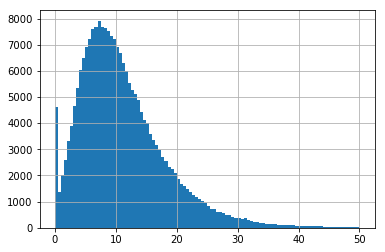

In [61]:
delays[delays.arr_del15_avg < 50].arr_del15_avg.hist(bins=100)

In [64]:
delays[delays.arr_del15_avg > 20].groupby(['airport_name']).year.count().nlargest(20)

airport_name
Newark, NJ: Newark Liberty International                 886
New York, NY: LaGuardia                                  764
Chicago, IL: Chicago O'Hare International                573
San Francisco, CA: San Francisco International           508
Philadelphia, PA: Philadelphia International             463
Atlanta, GA: Hartsfield-Jackson Atlanta International    334
New York, NY: John F. Kennedy International              308
Rochester, NY: Greater Rochester International           291
Buffalo, NY: Buffalo Niagara International               268
Boston, MA: Logan International                          259
Richmond, VA: Richmond International                     224
Detroit, MI: Detroit Metro Wayne County                  217
Syracuse, NY: Syracuse Hancock International             217
Providence, RI: Theodore Francis Green State             211
Norfolk, VA: Norfolk International                       207
Charlotte, NC: Charlotte Douglas International           205
Cleveland, 

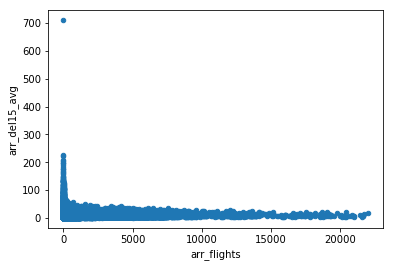

In [26]:
%matplotlib inline 
delays.plot('arr_flights', 'arr_del15_avg', kind='scatter')

In [74]:
delays[delays.arr_del15_pct > .2].groupby(['carrier', 'airport_name']).year.count().nlargest(20).unstack()

airport_name  Charlotte, NC: Charlotte Douglas International  \
carrier                                                        
AA                                                       NaN   
B6                                                       NaN   
DL                                                       NaN   
EV                                                     122.0   
F9                                                       NaN   
OO                                                       NaN   
UA                                                       NaN   
US                                                       NaN   

airport_name  Columbia, SC: Columbia Metropolitan  \
carrier                                             
AA                                            NaN   
B6                                            NaN   
DL                                            NaN   
EV                                          125.0   
F9                                            NaN   
OO                                            NaN   
UA                                            NaN   
US                                            NaN   

airport_name  Key West, FL: Key West International  New York, NY: LaGuardia  \
carrier                                                                       
AA                                             NaN                    133.0   
B6                                             NaN                    143.0   
DL                                             NaN                      NaN   
EV                                           127.0                      NaN   
F9                                             NaN                    136.0   
OO                                             NaN                      NaN   
UA                                             NaN                    134.0   
US                                             NaN                      NaN   

airport_name  Newark, NJ: Newark Liberty International  \
carrier                                                  
AA                                               150.0   
B6                                               130.0   
DL                                               136.0   
EV                                                 NaN   
F9                                                 NaN   
OO                                                 NaN   
UA                                               124.0   
US                                               128.0   

airport_name  Portland, OR: Portland International  \
carrier                                              
AA                                           122.0   
B6                                             NaN   
DL                                             NaN   
EV                                             NaN   
F9                                             NaN   
OO                                             NaN   
UA                                             NaN   
US                                             NaN   

airport_name  Rochester, NY: Greater Rochester International  \
carrier                                                        
AA                                                       NaN   
B6                                                       NaN   
DL                                                       NaN   
EV                                                       NaN   
F9                                                       NaN   
OO                                                       NaN   
UA                                                     130.0   
US                                                       NaN   

airport_name  San Francisco, CA: San Francisco International  \
carrier                                                        
AA                                                     137.0   
B6                                                       NaN   
DL                

In [20]:
dfx = delays[delays.arr_del15_pct > .2].groupby(['carrier', 'airport_name']).year.count().plot.bar()
#dfx.plot.bar('carrier', 'count', by='airport')


In [ ]:
delays_carriers = delays.groupby('carrier').agg({'arr_del15': })
delays_carriers

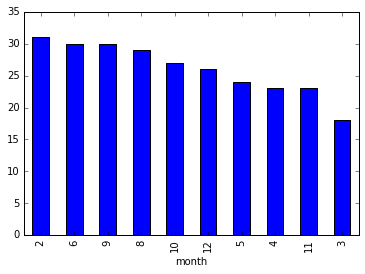

In [224]:
dfx = delays.groupby(['year', 'month', 'airport'])
#dfx.weather_ctpct.agg(['max', 'min', 'mean']).sort_values('max', ascending=False)
%matplotlib inline
dfx = dfx.weather_ctpct.agg('mean').reset_index()
#dfx[dfx.weather_ctpct > 0.].boxplot('weather_ctpct', by='month') #quantile([.01, .05, .25, .5, .75, .95, .99])
dfx[dfx.weather_ctpct > .35].groupby('airport').weather_ctpct.count().nlargest(10).plot('bar')
# above iqr cancellations, 10 most frequent months 
dfx[dfx.weather_ctpct > .35].groupby('month').weather_ctpct.count().nlargest(10).plot('bar')
#dfx[dfx.weather_ctpct < .35].groupby('airport').weather_ctpct.count().nsmallest(10).plot('bar')

/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are ret

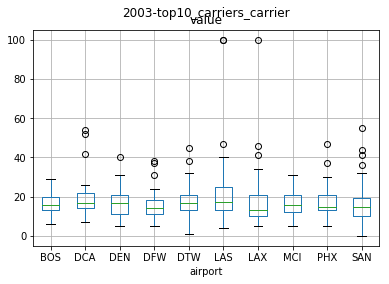

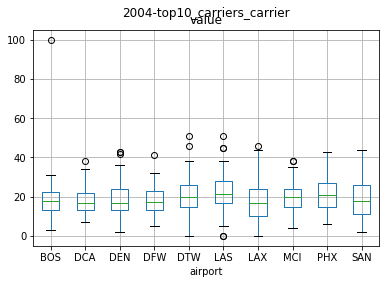

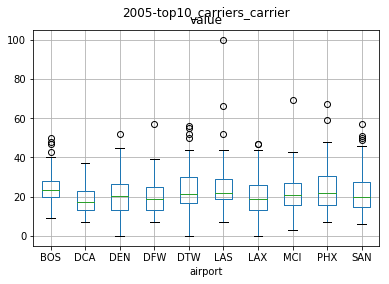

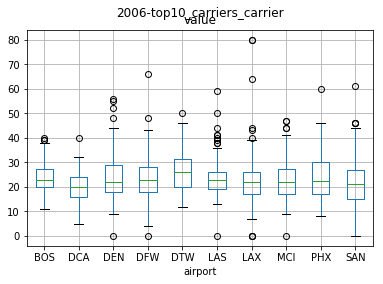

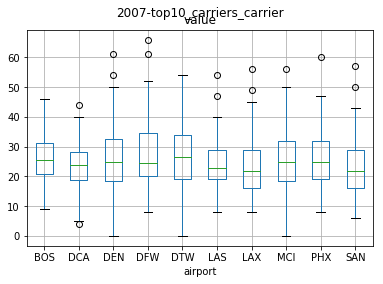

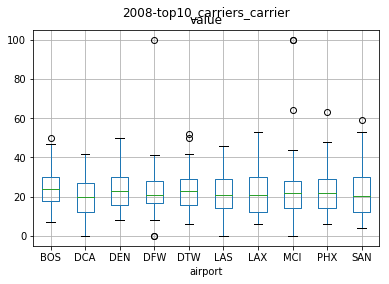

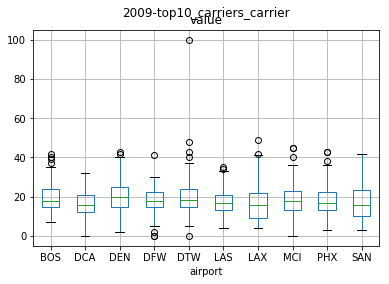

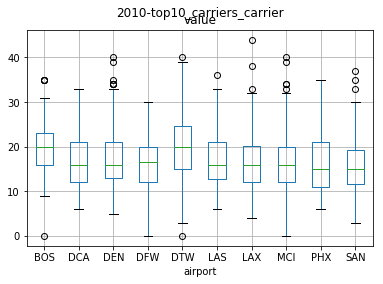

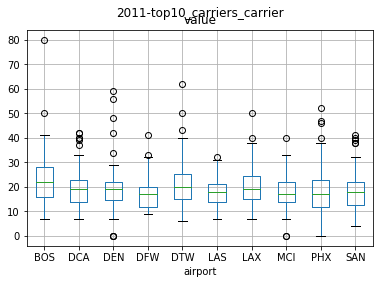

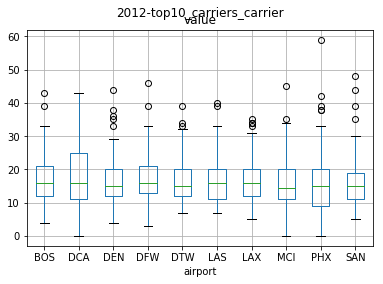

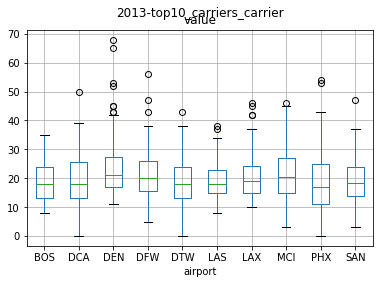

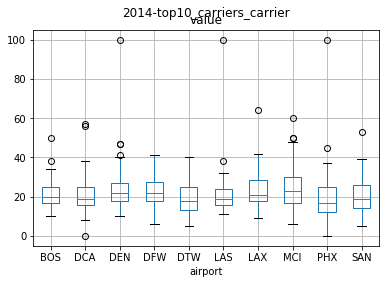

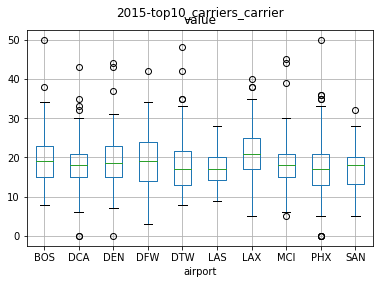

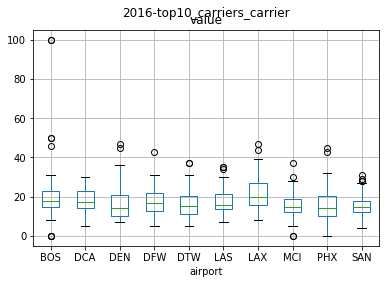

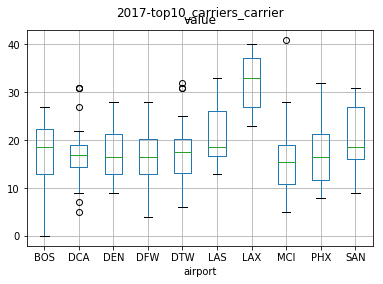

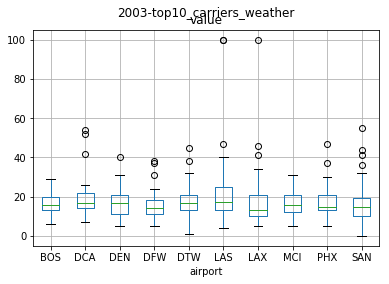

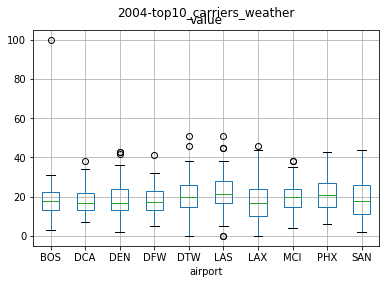

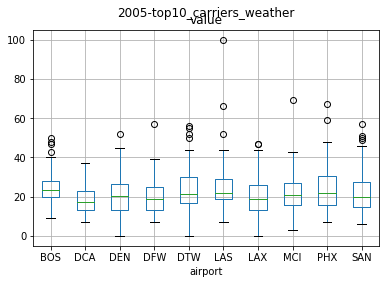

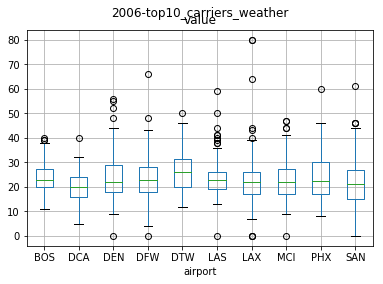

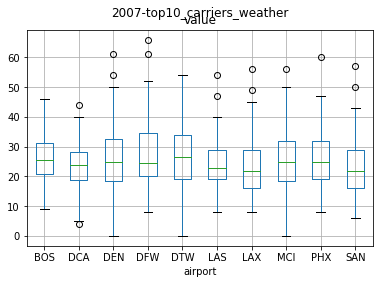

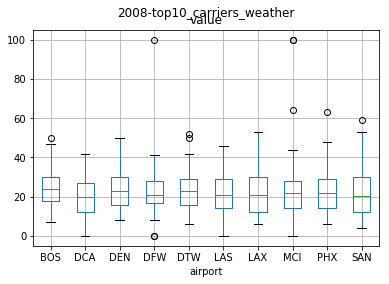

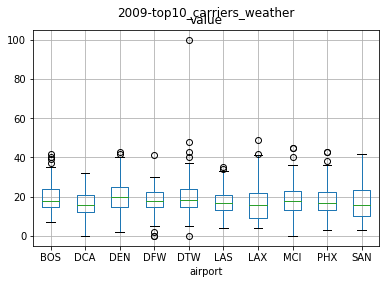

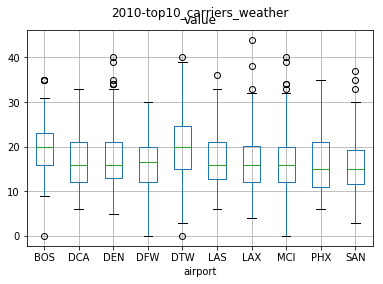

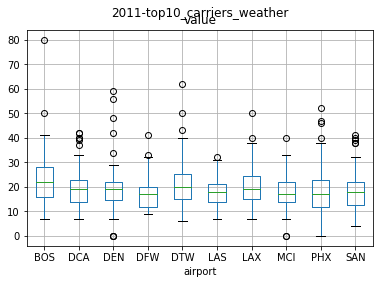

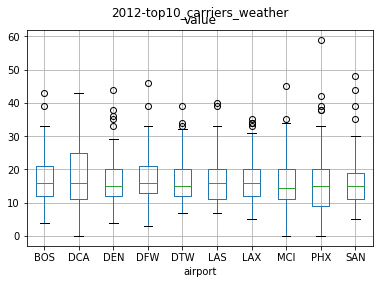

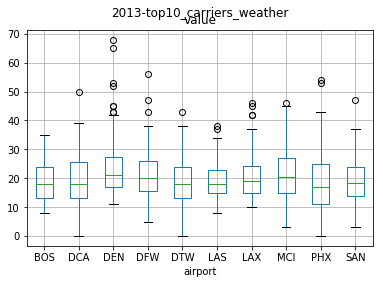

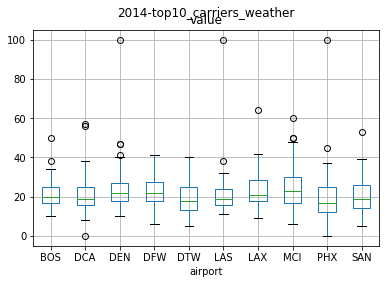

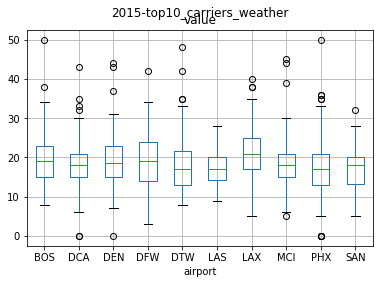

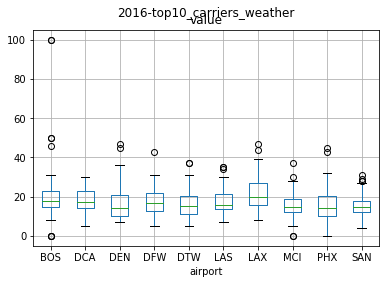

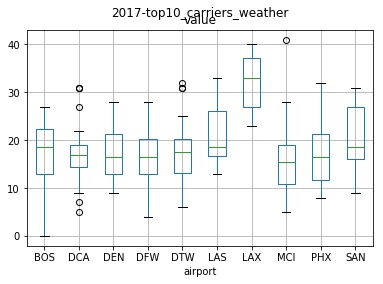

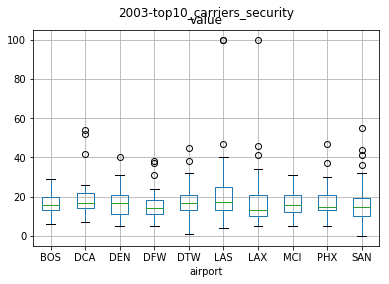

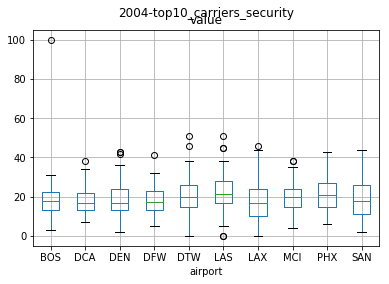

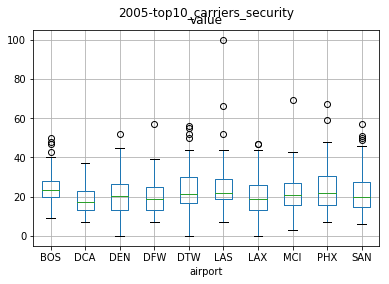

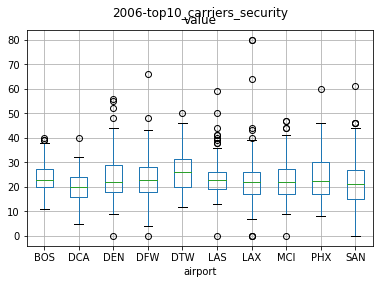

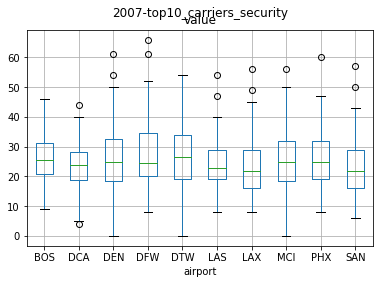

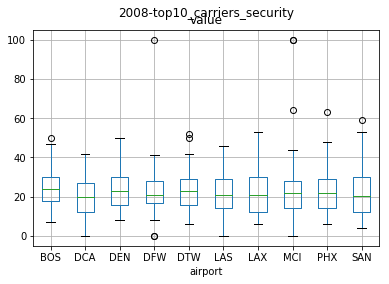

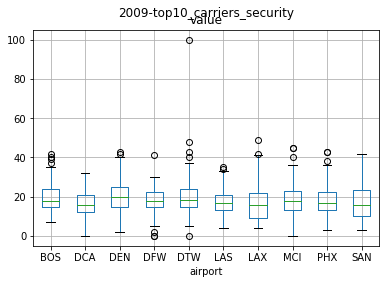

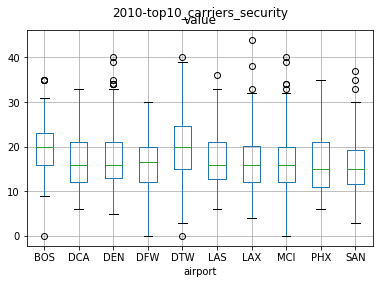

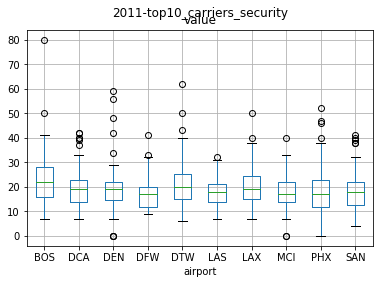

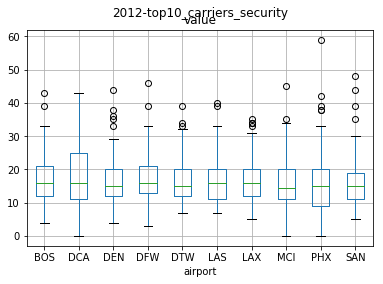

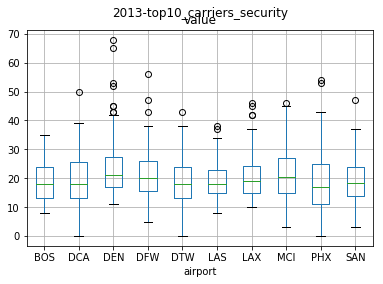

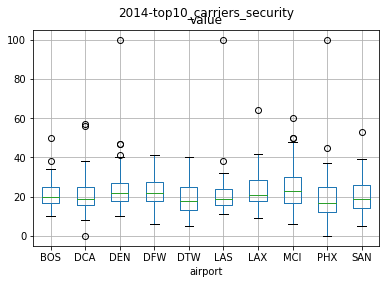

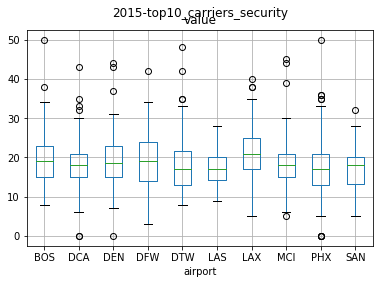

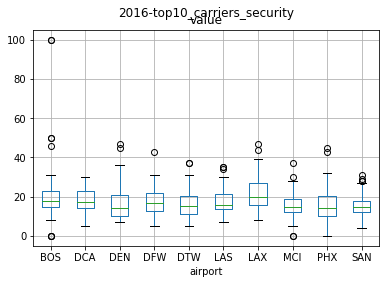

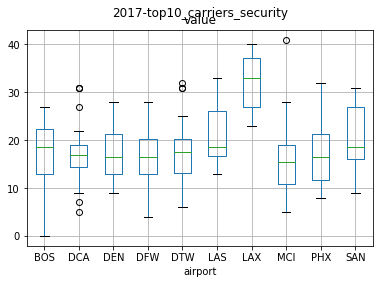

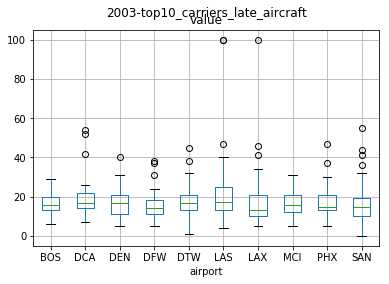

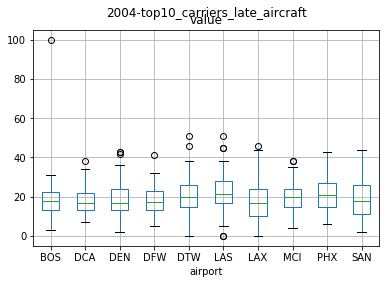

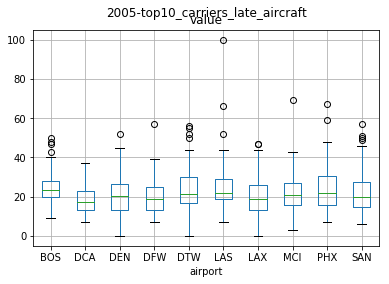

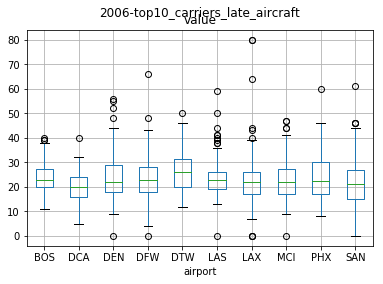

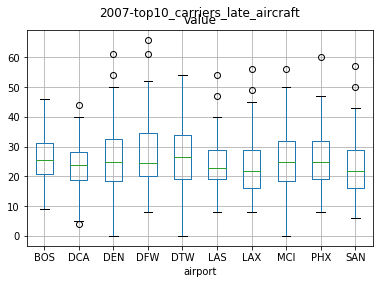

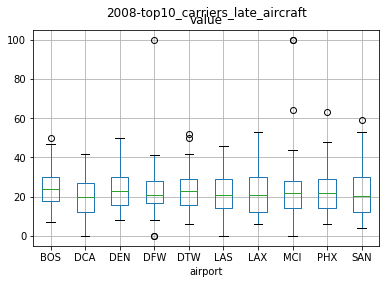

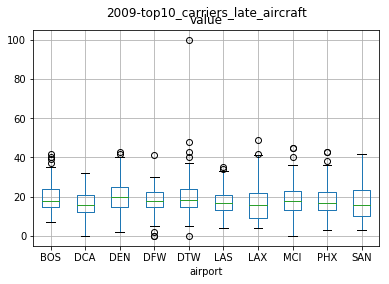

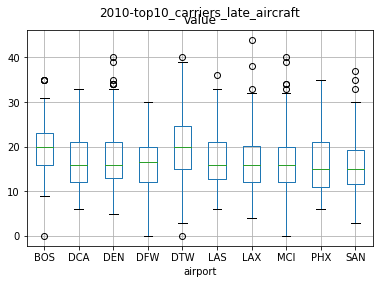

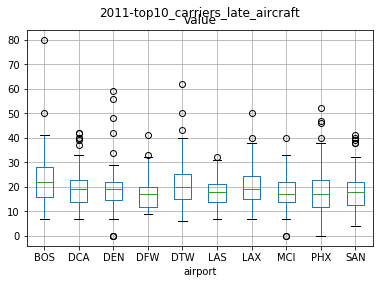

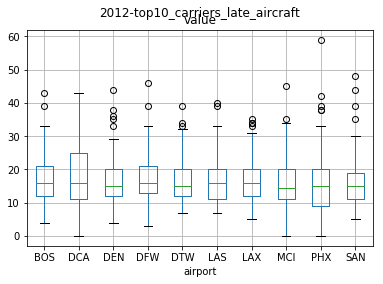

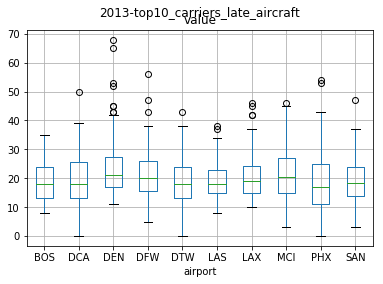

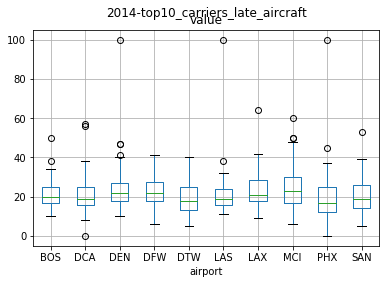

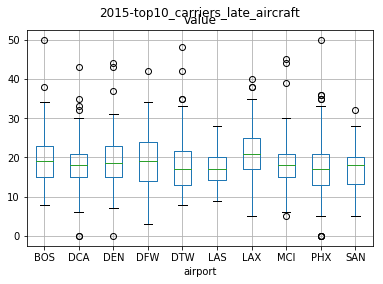

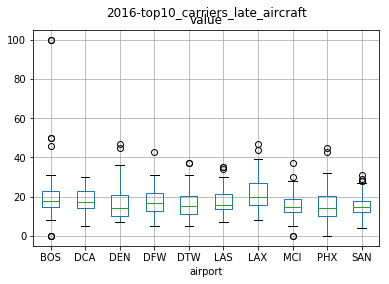

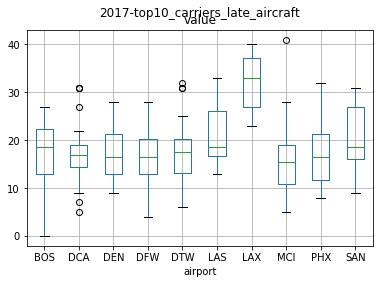

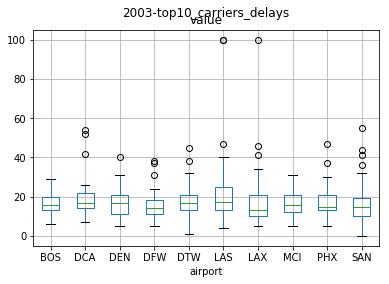

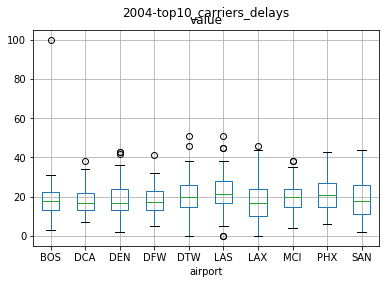

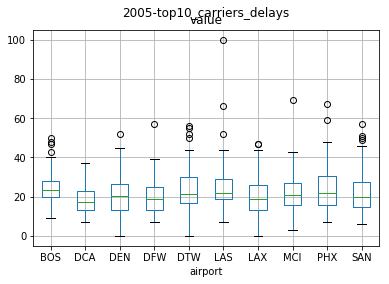

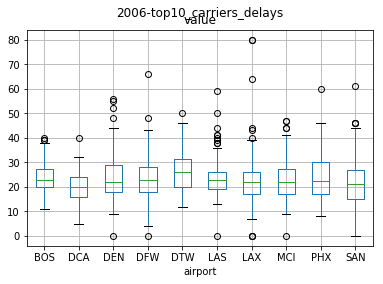

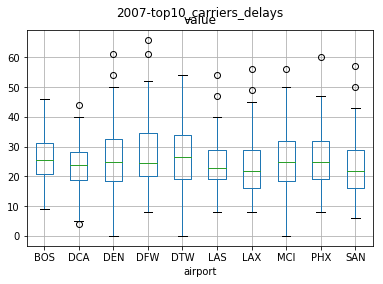

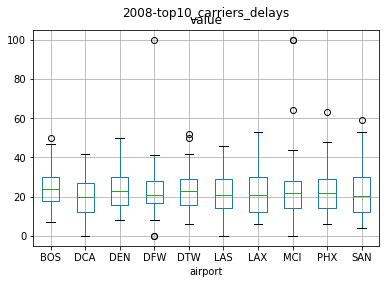

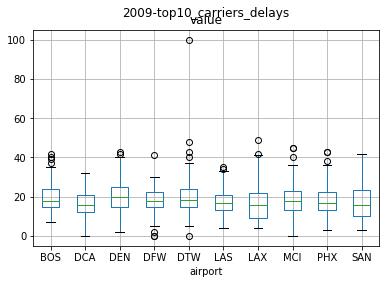

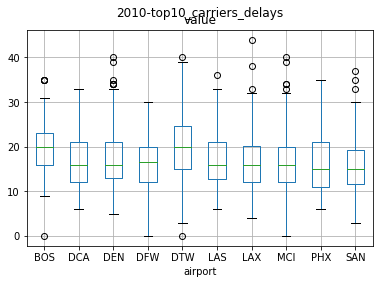

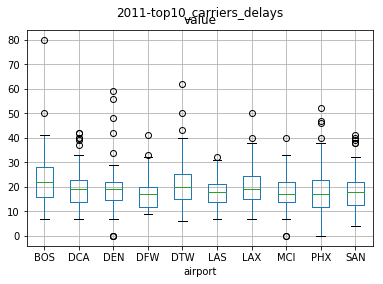

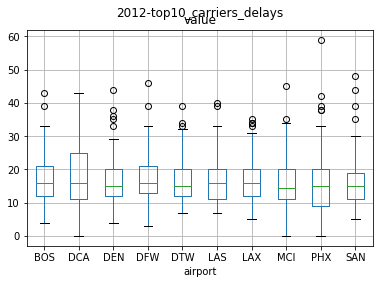

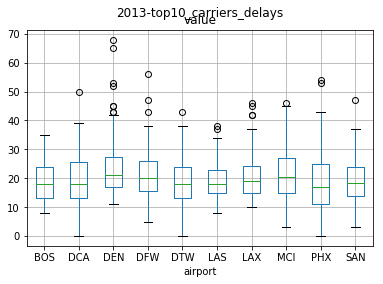

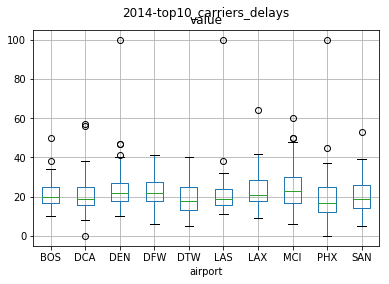

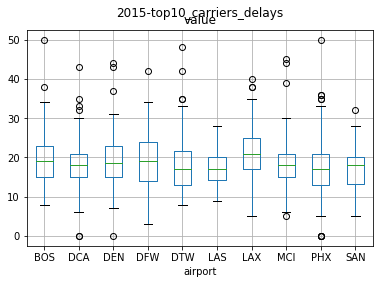

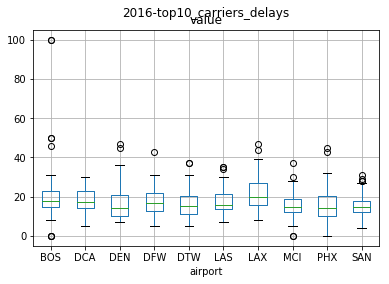

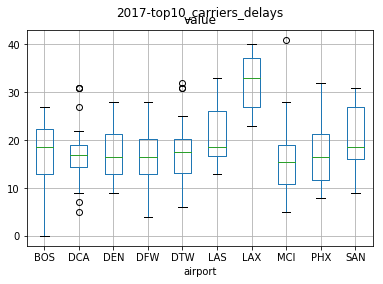

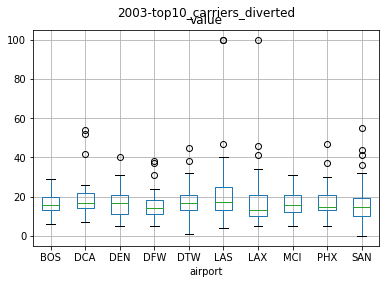

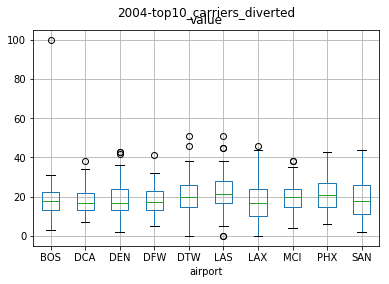

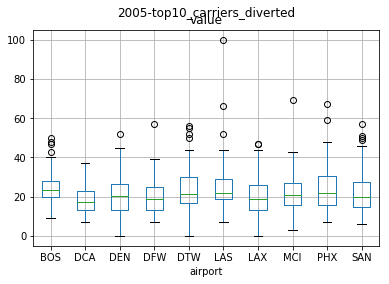

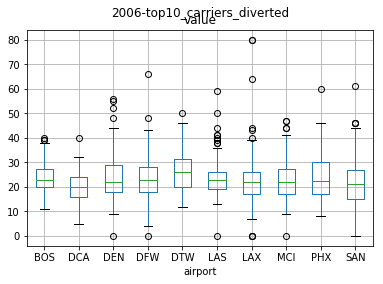

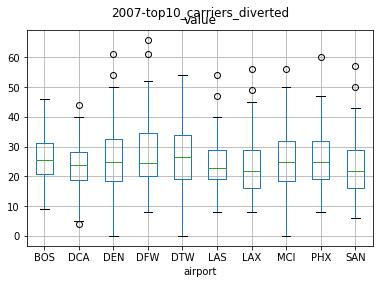

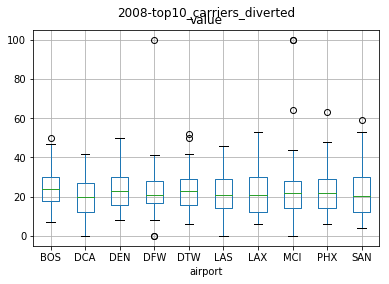

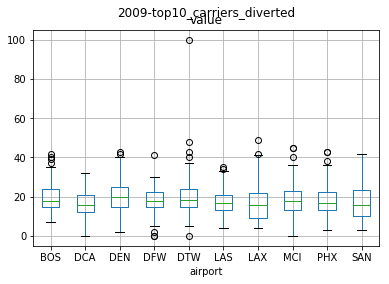

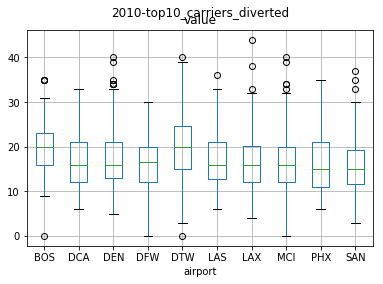

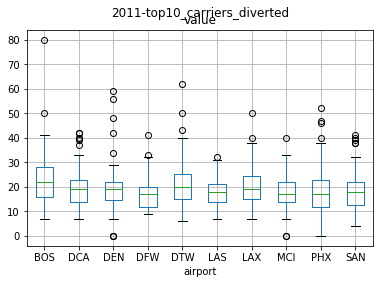

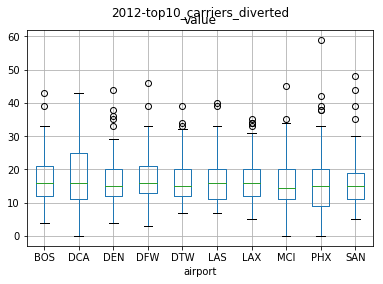

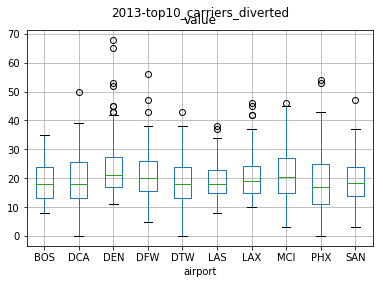

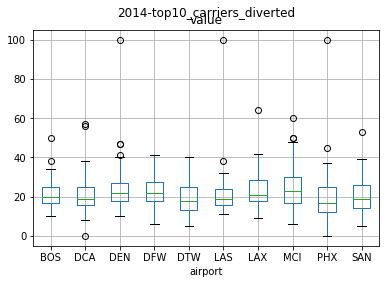

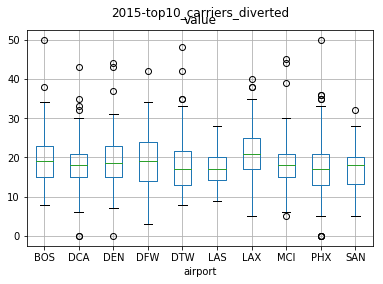

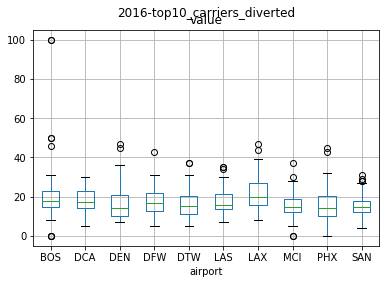

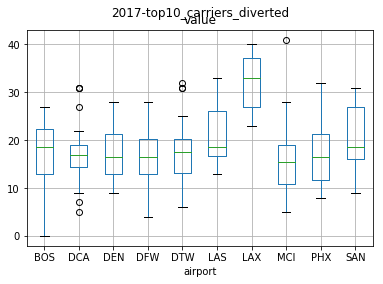

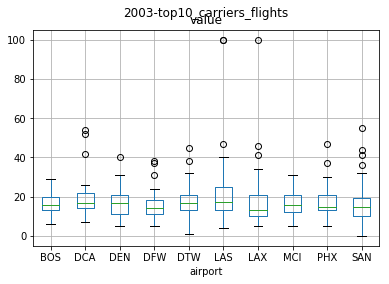

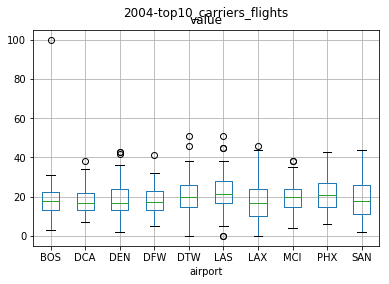

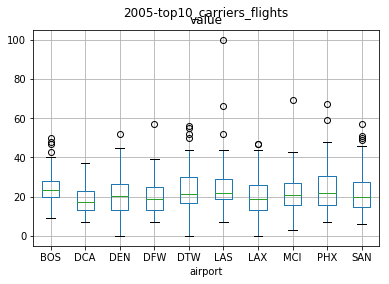

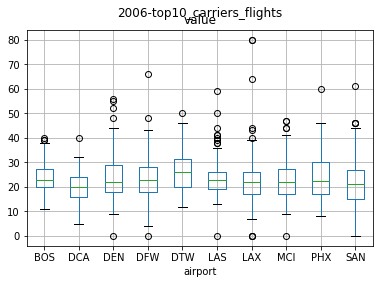

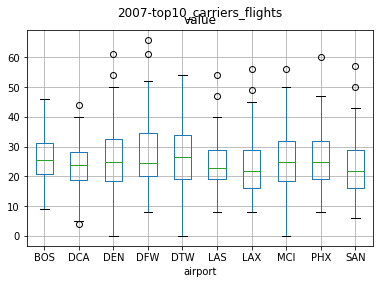

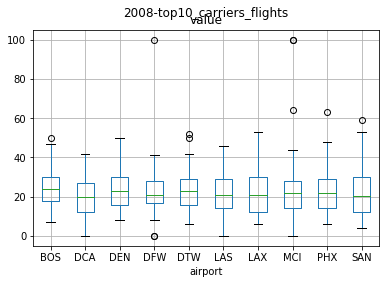

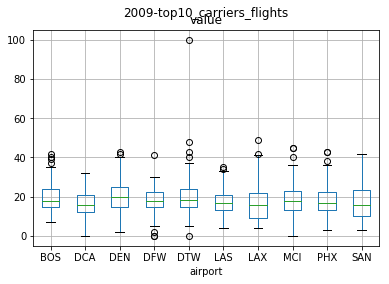

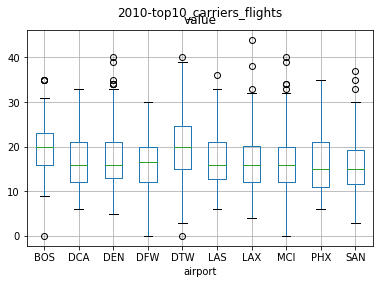

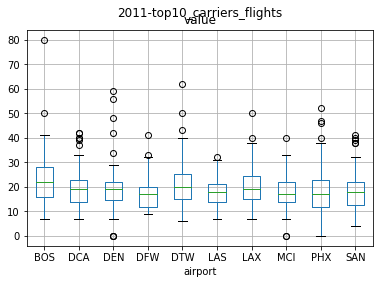

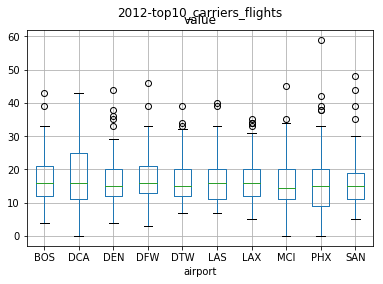

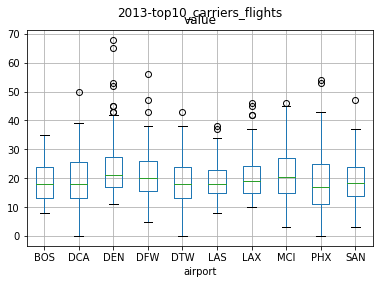

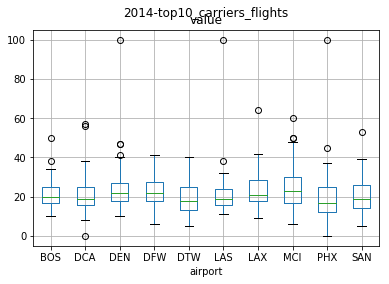

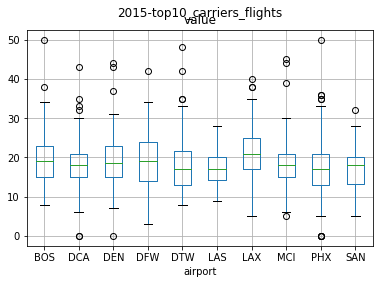

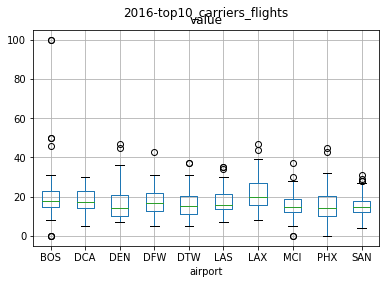

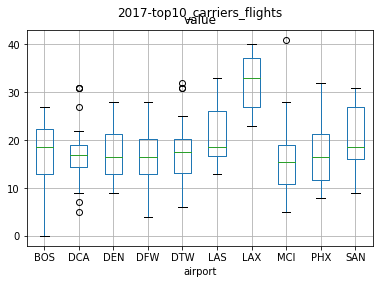

In [60]:
%matplotlib inline

from matplotlib import pyplot as plt


vars = locals()
top10s = [(v, vars[v]) for v in top10s_carriers]
for top10name, top10_carriers in top10s:
    # get delays for top10 carrier by cause
    dfx = delays[delays.carrier.isin(top10_carriers.index)]
    # get top 10 airports by flights 
    top10_airports = dfx.groupby('airport').arr_flights.count().sort_values(ascending=False).index[0:10]
    dfx = dfx.loc[delays.airport.isin(top10_airports)]
    # get delays reported by month
    dfx.loc[:, 'value'] = (dfx['arr_del15_pct'] * 100).fillna(0).astype(int)
    dfx.loc[:, 'name'] = dfx['airport']
    # aggregate by year
    for g, gdf in df.groupby('year'):
        gdf.boxplot('value', by='airport')
        plt.suptitle('{}-{}'.format(g, top10name))
        exp = gdf[['carrier', 'year', 'month', 'name', 'value']]
        exp.loc[:, 'groupid'] = exp.apply(lambda r: '{r.month}_{r.carrier}'.format(**locals()), axis=1)

        
        #exp.sort_values(['name']).to_csv('data/delays_{}_{}.csv'.format(g, top10name), index_label='index')

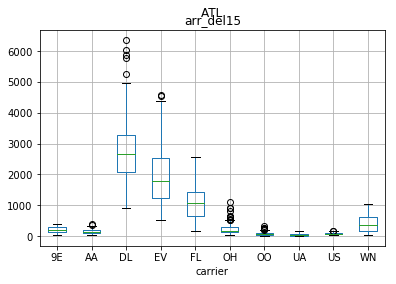

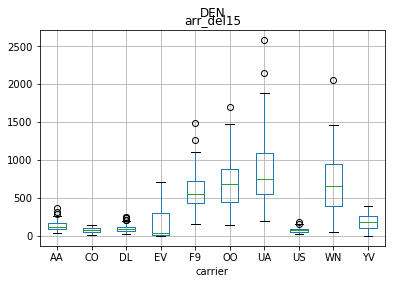

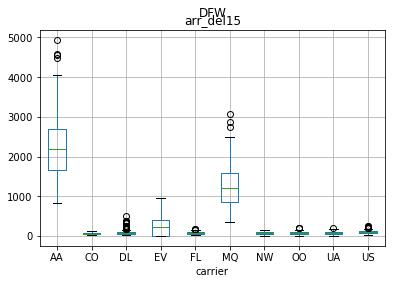

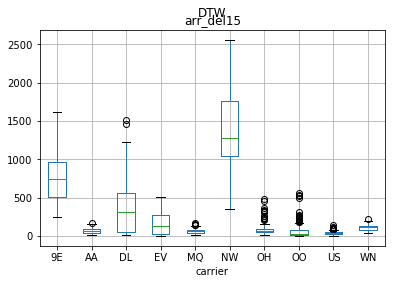

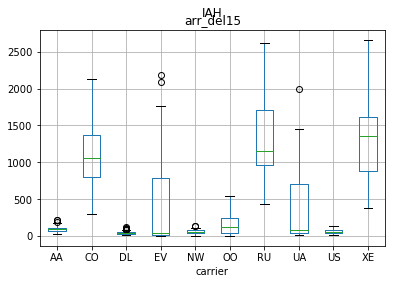

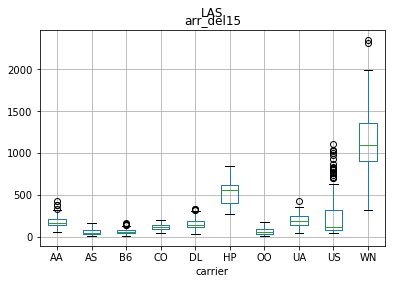

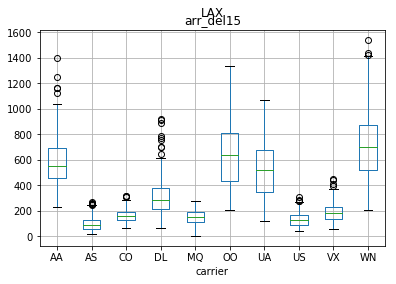

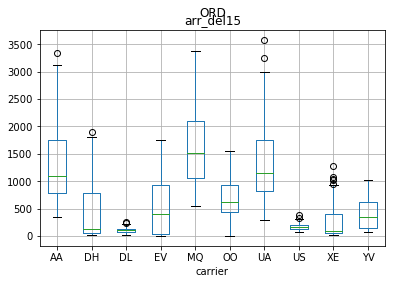

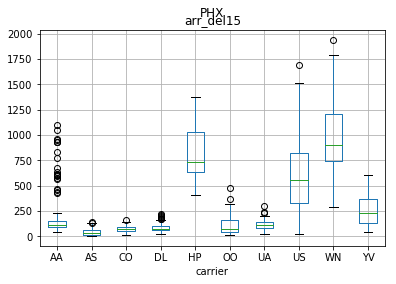

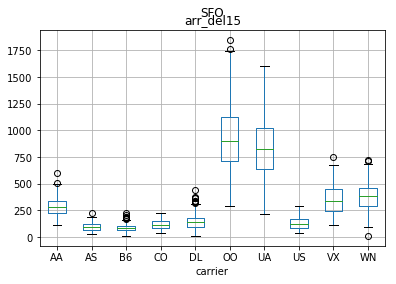

In [121]:
dfx = delays[delays.airport.isin(top10_airports_flights.index)]
for g, gdf in dfx.groupby(c('airport')):
    t10 = gdf.groupby('carrier').arr_flights.sum().nlargest(10)
    xgdf = gdf[gdf.carrier.isin(t10.index)]
    xgdf.boxplot('arr_del15', by='carrier')
    plt.suptitle(g)


/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/anaconda/envs/py3k/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are ret

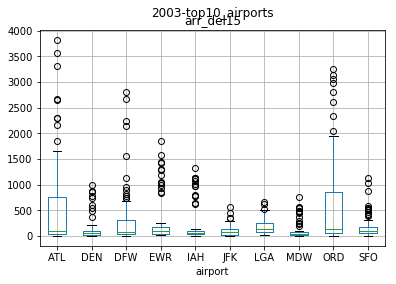

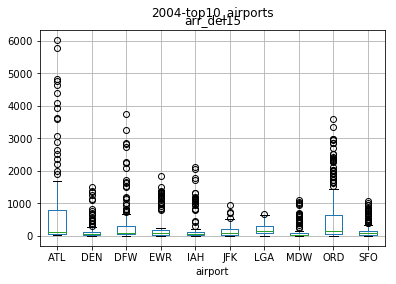

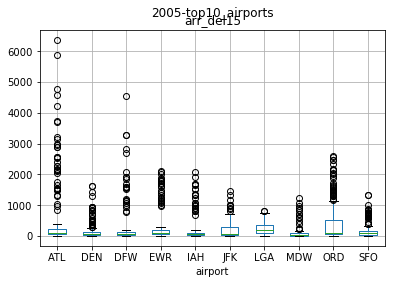

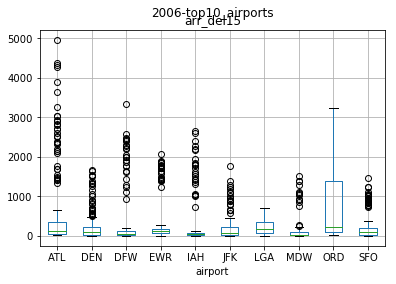

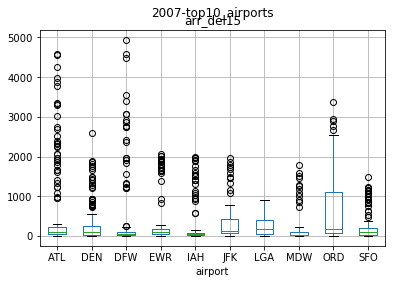

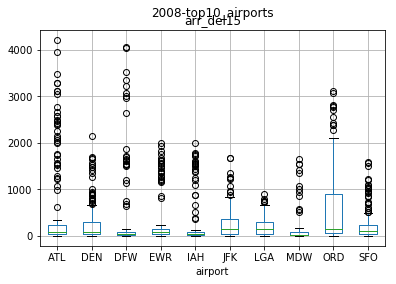

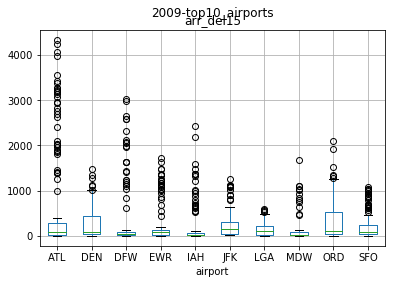

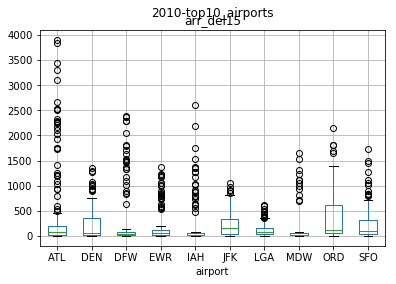

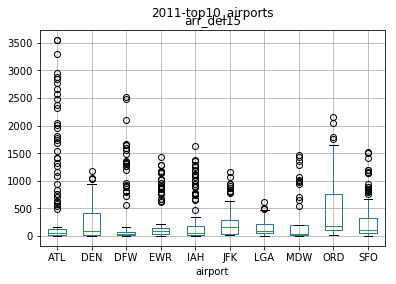

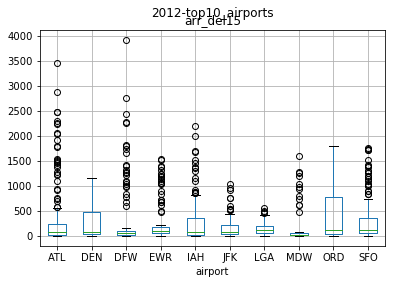

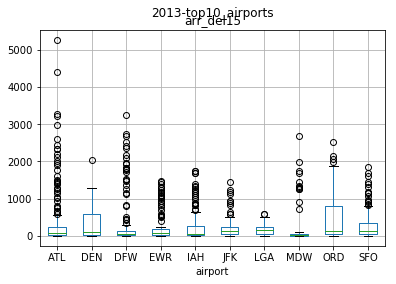

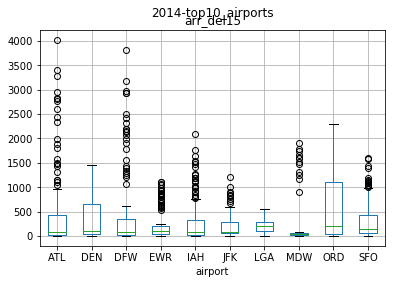

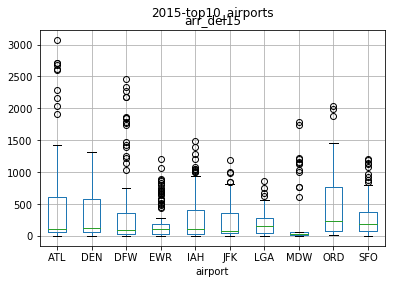

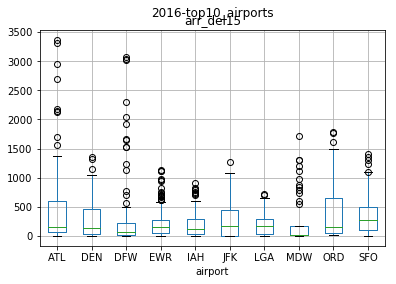

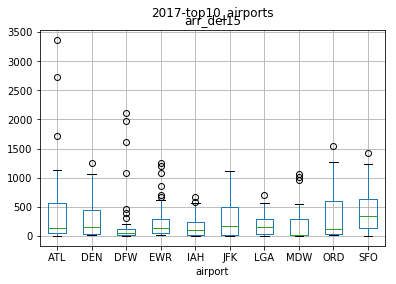

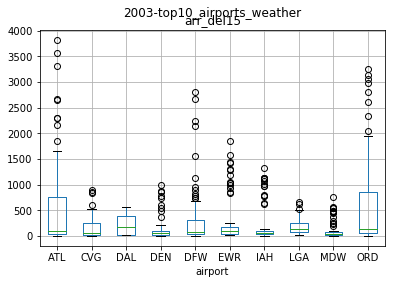

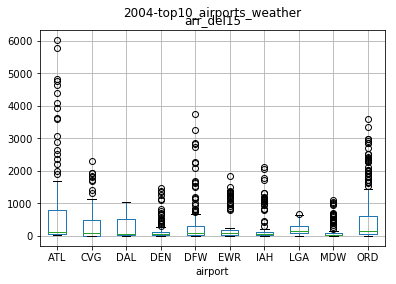

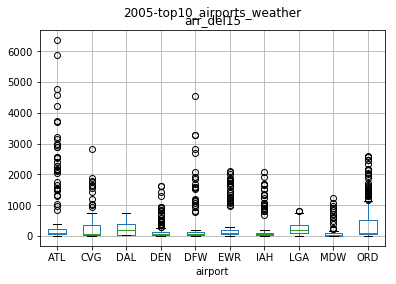

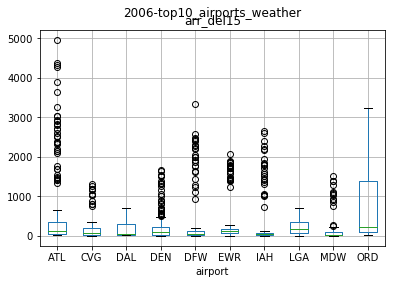

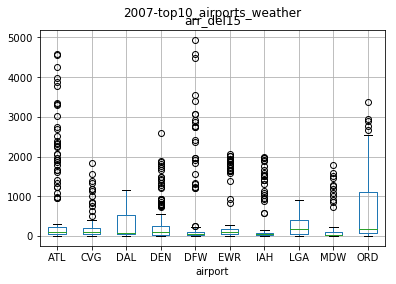

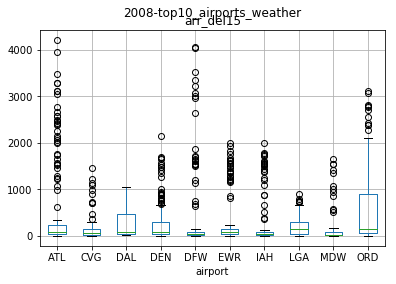

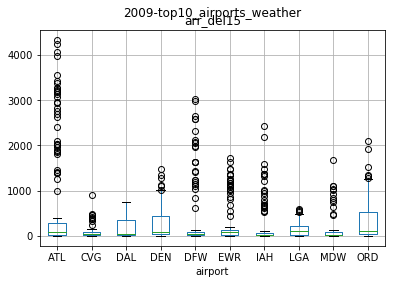

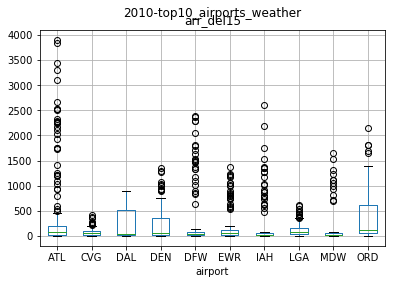

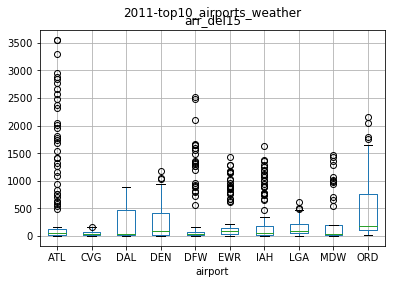

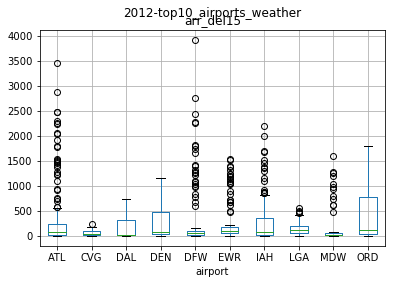

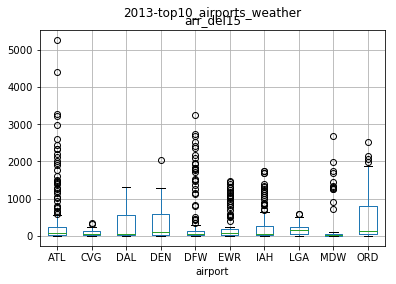

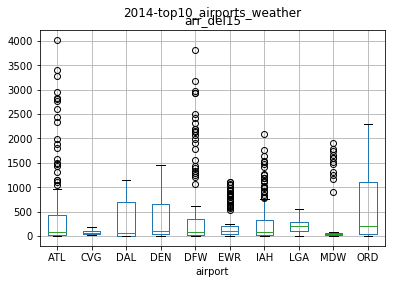

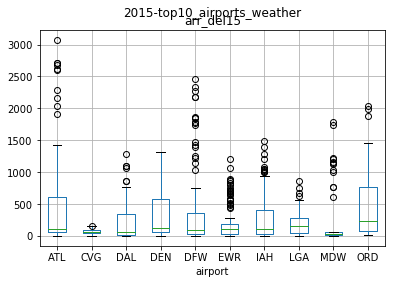

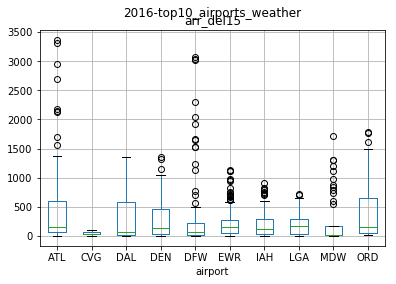

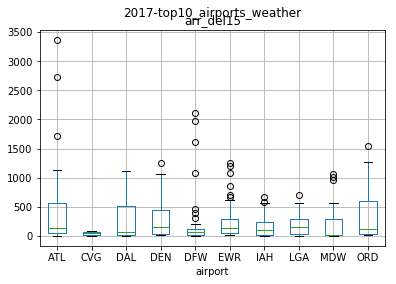

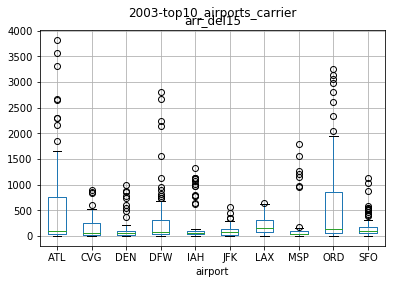

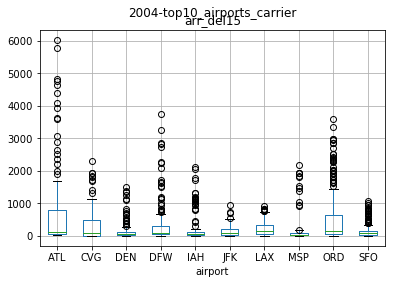

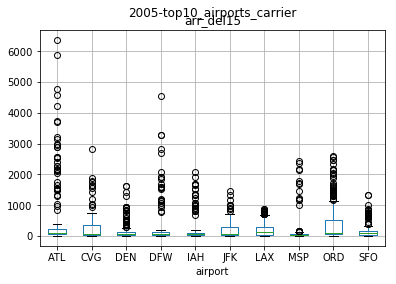

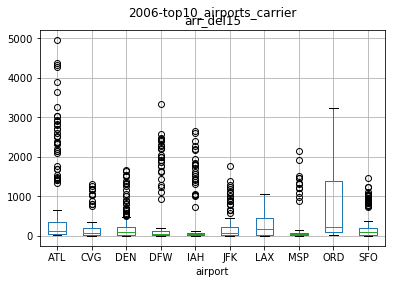

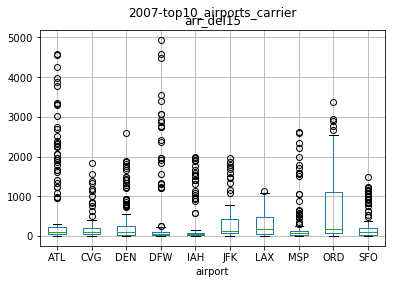

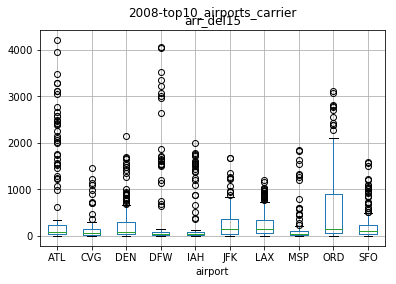

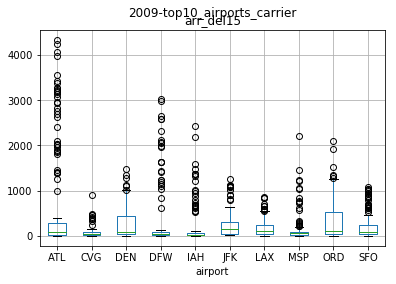

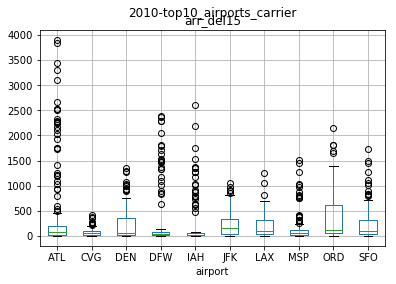

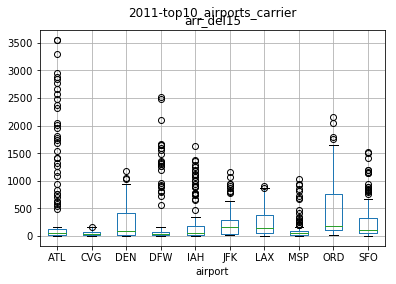

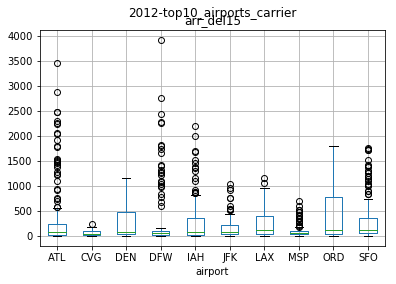

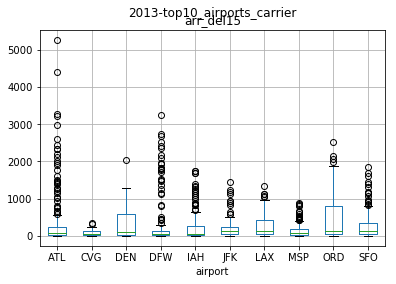

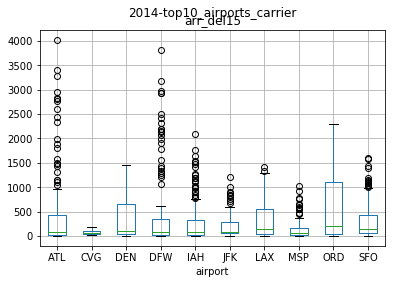

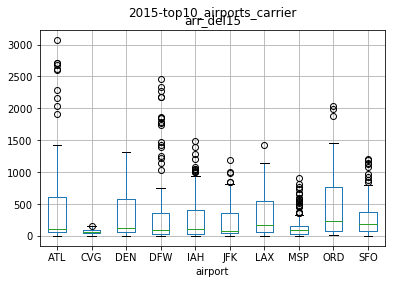

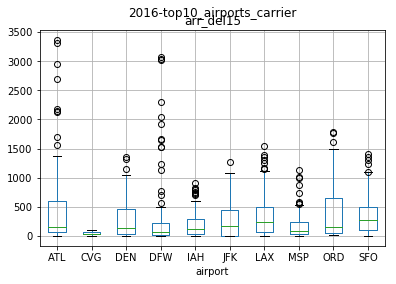

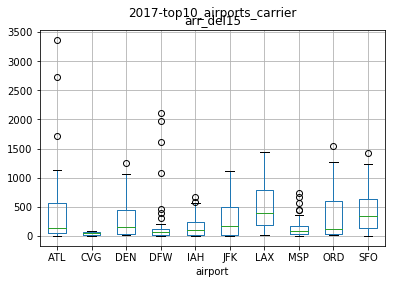

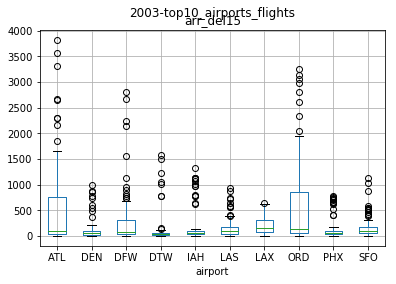

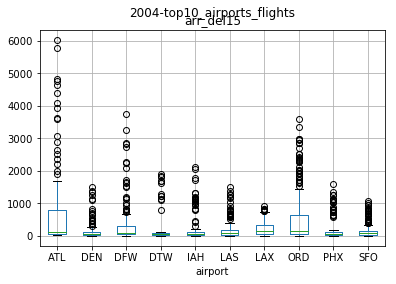

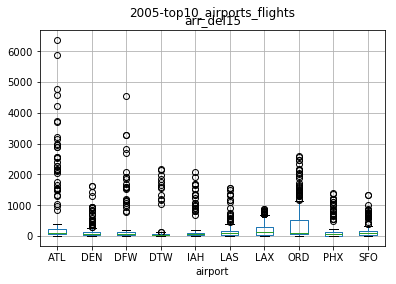

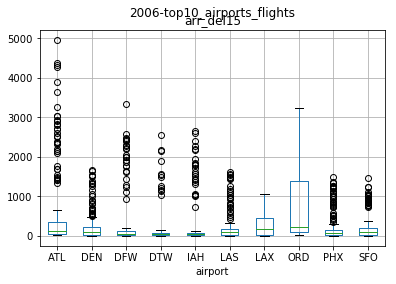

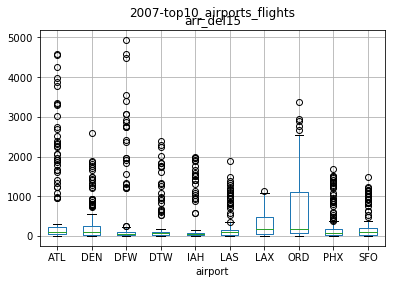

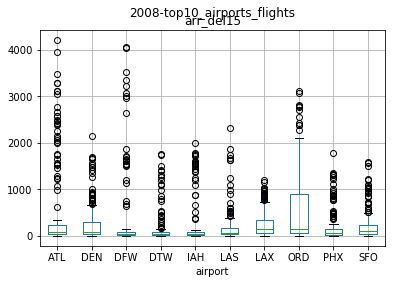

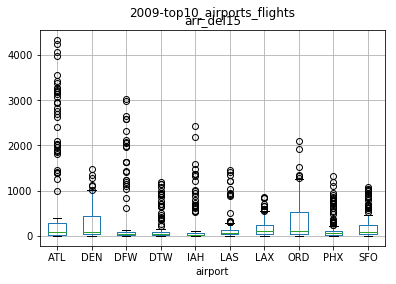

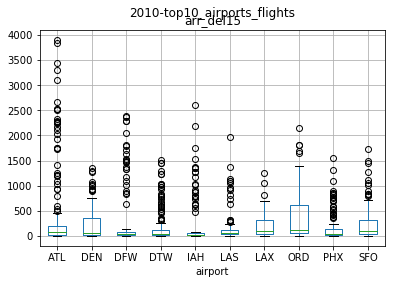

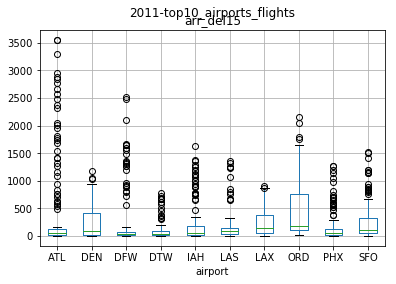

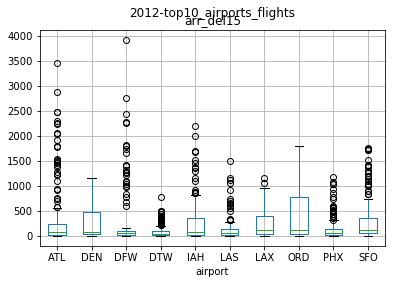

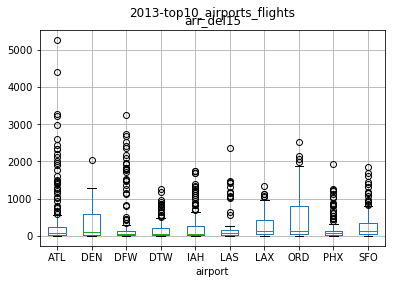

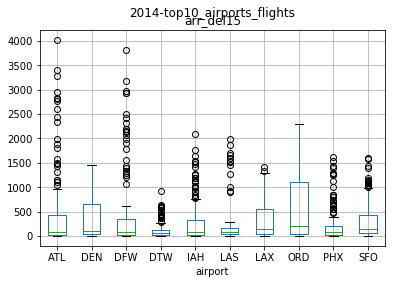

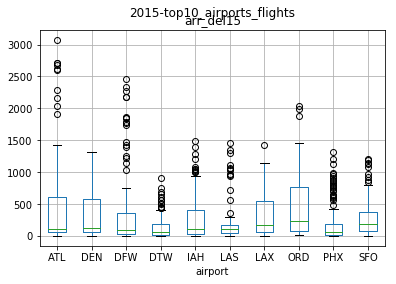

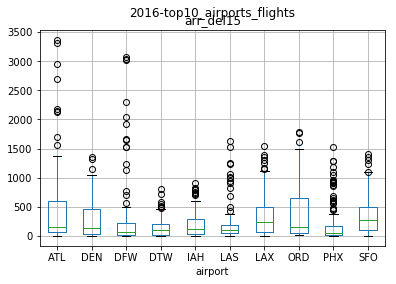

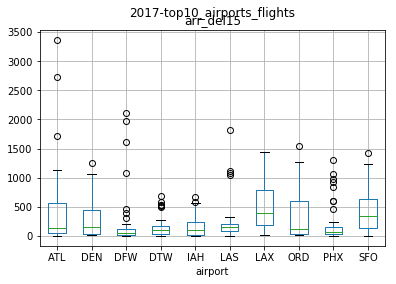

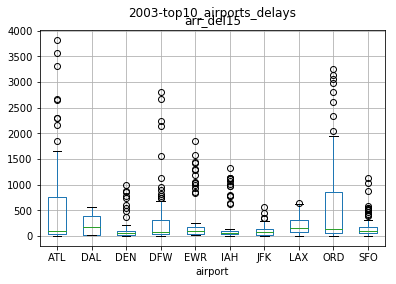

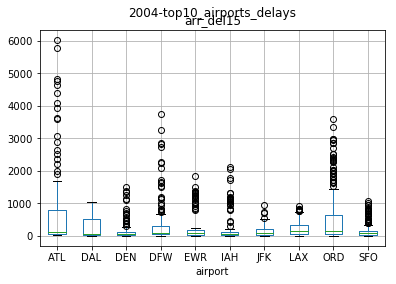

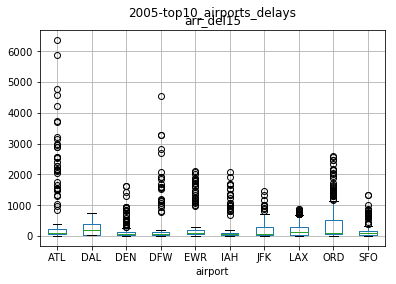

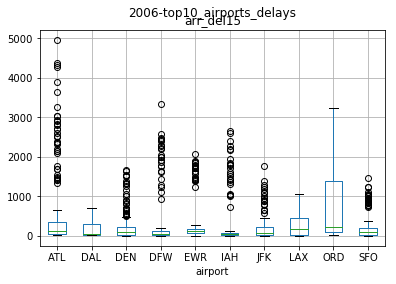

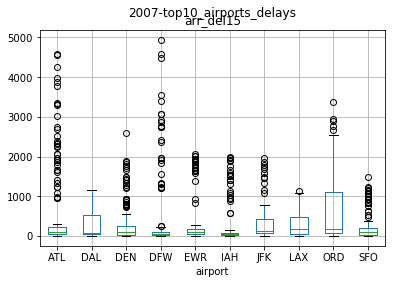

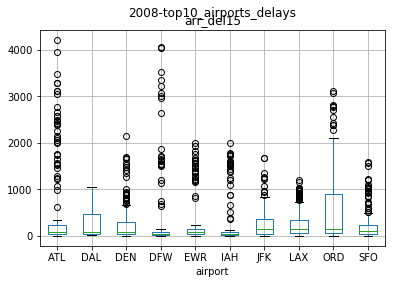

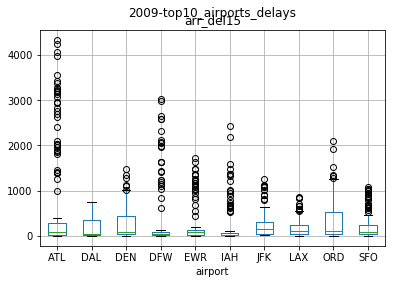

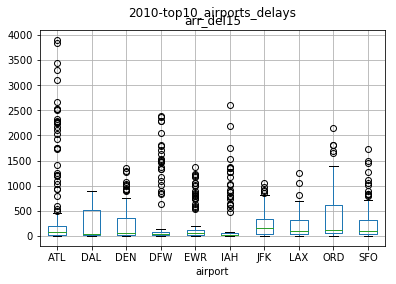

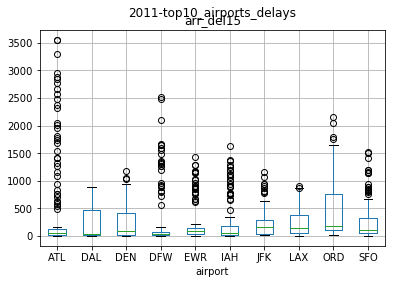

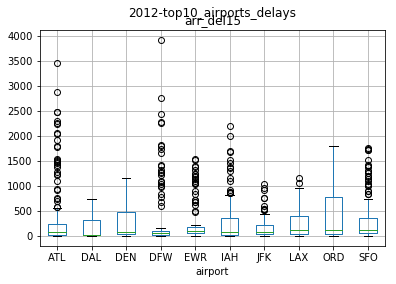

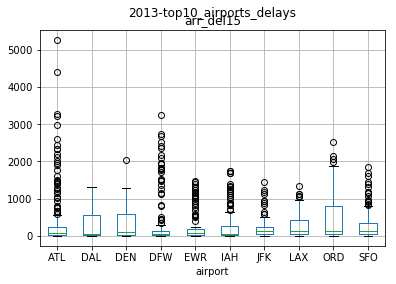

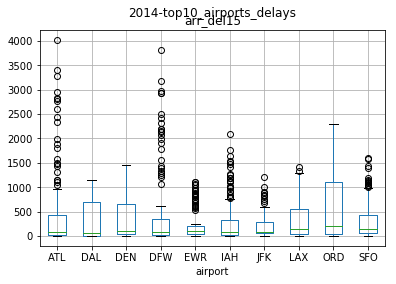

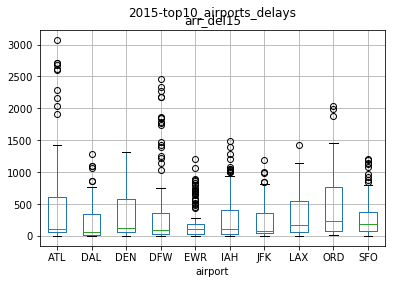

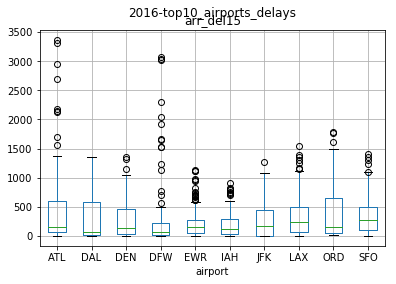

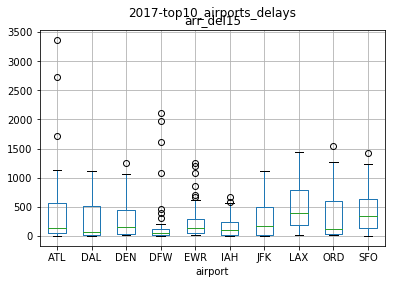

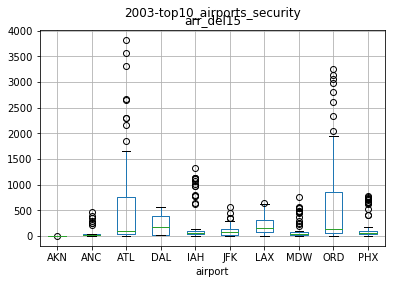

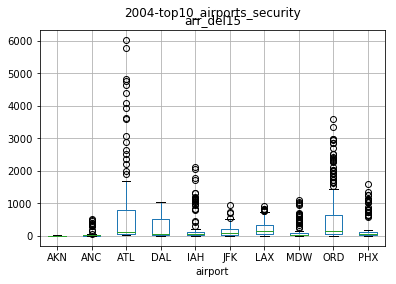

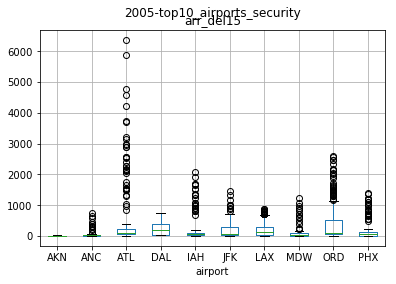

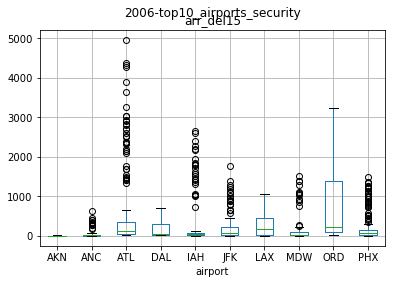

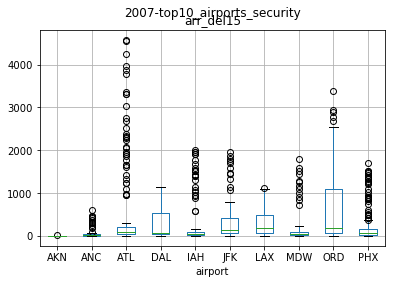

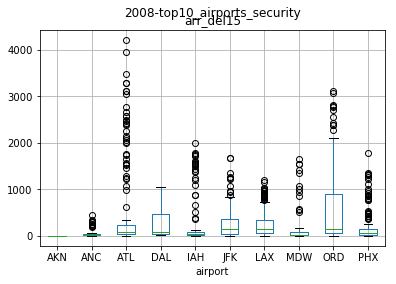

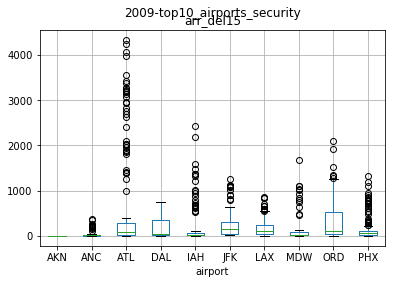

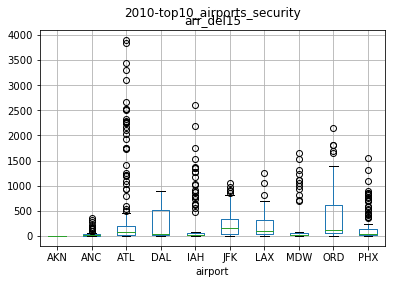

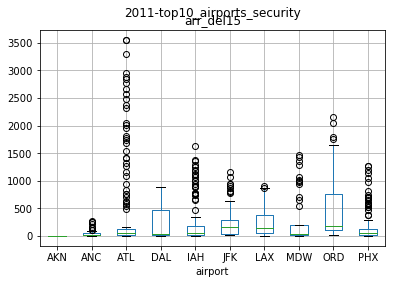

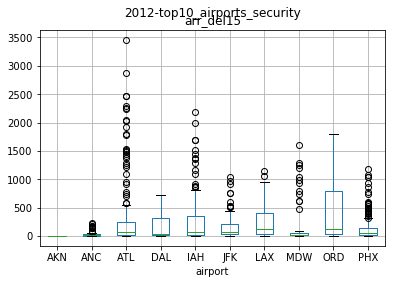

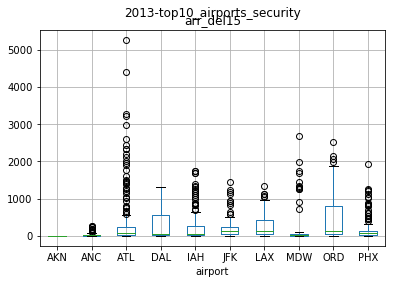

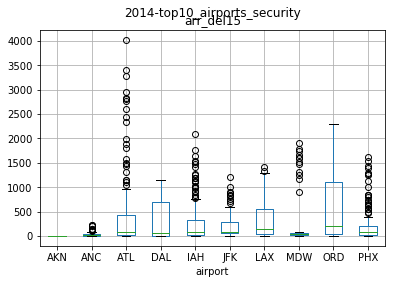

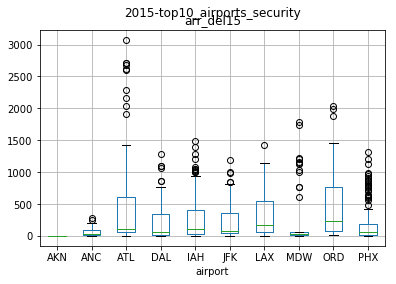

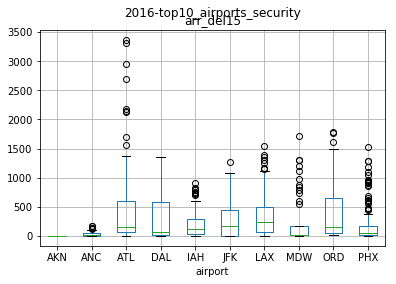

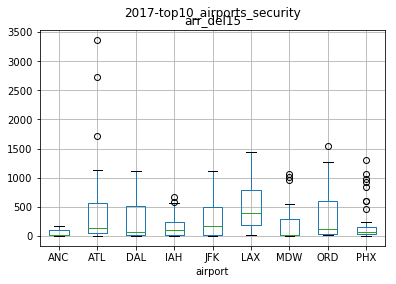

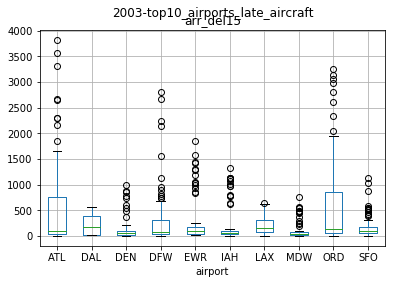

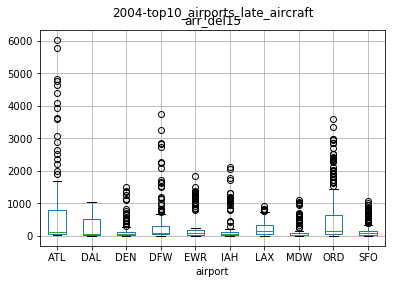

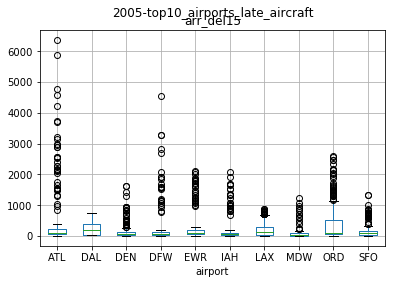

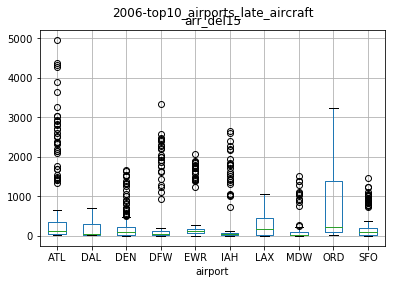

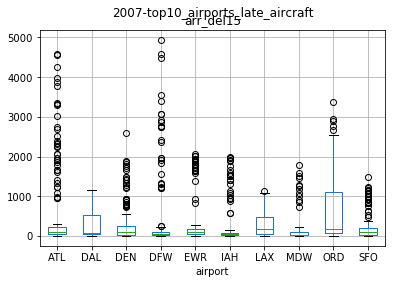

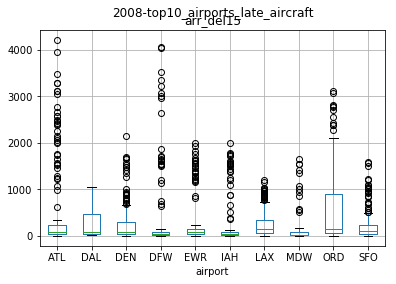

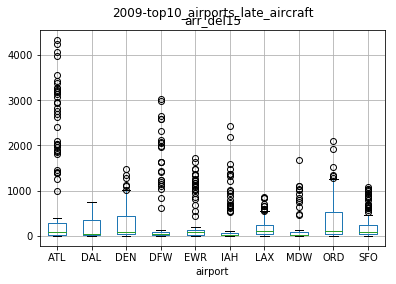

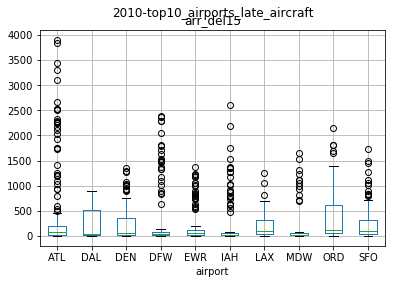

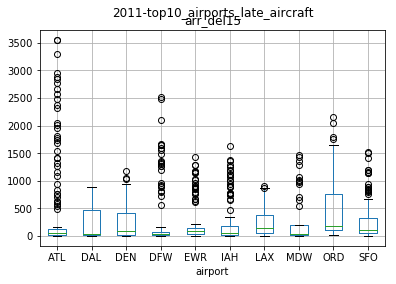

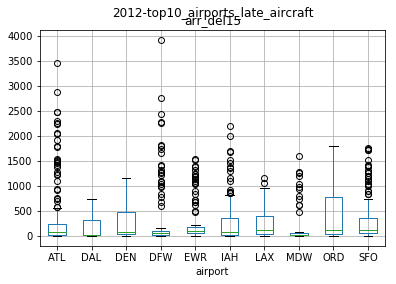

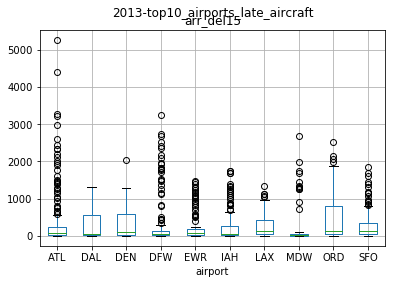

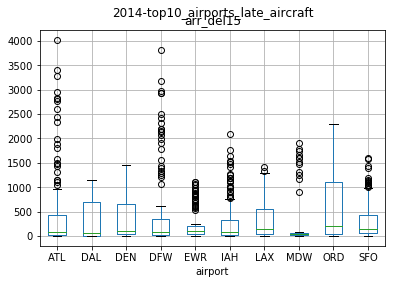

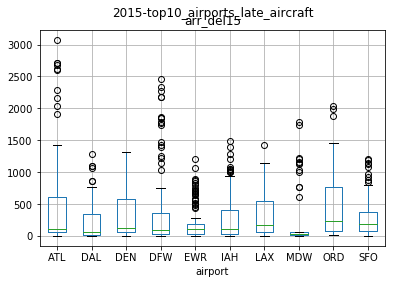

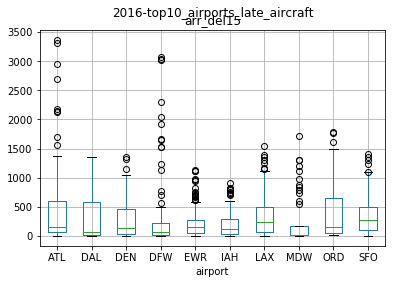

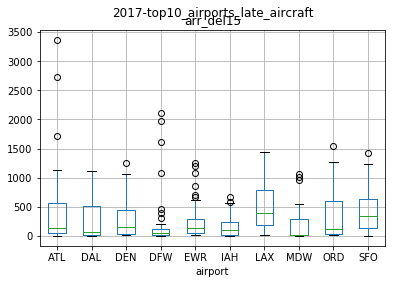

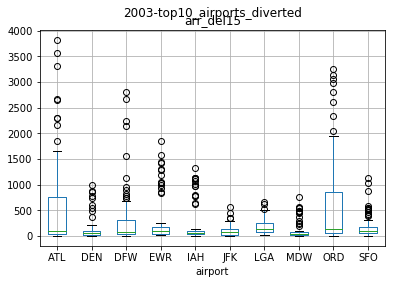

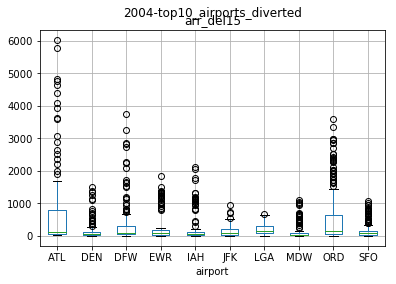

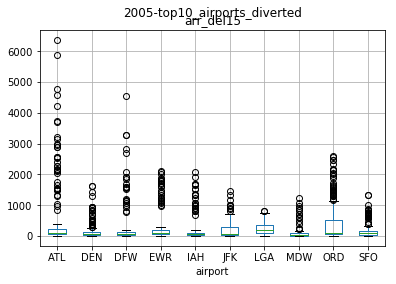

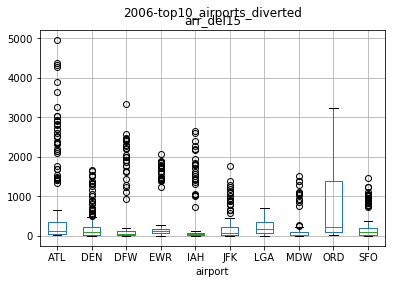

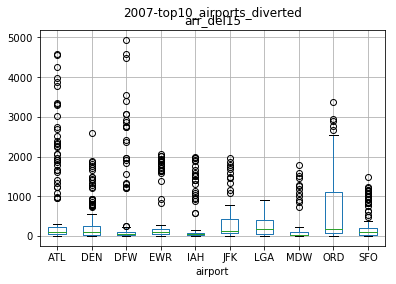

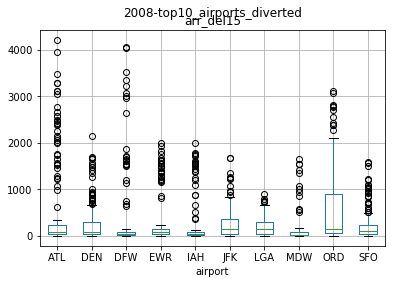

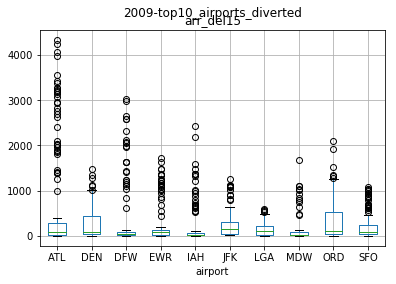

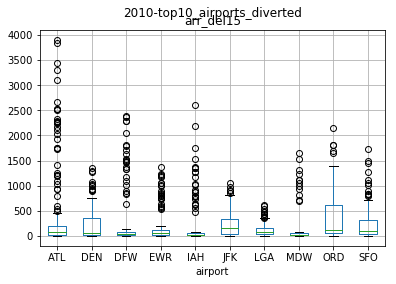

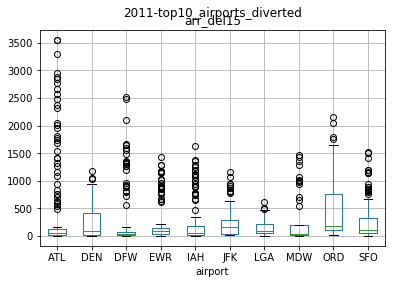

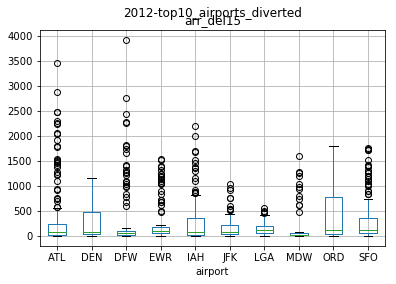

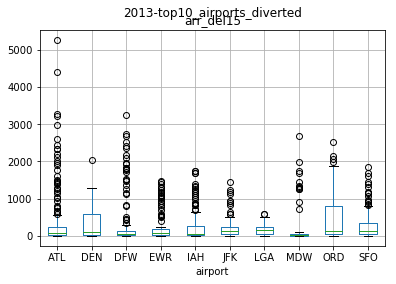

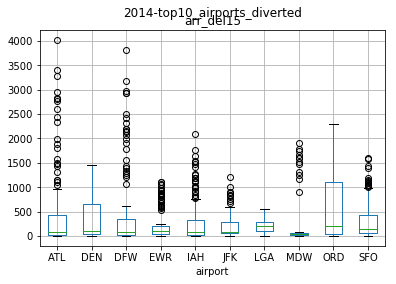

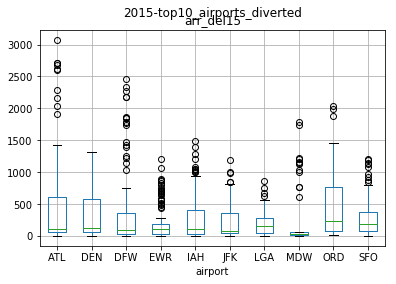

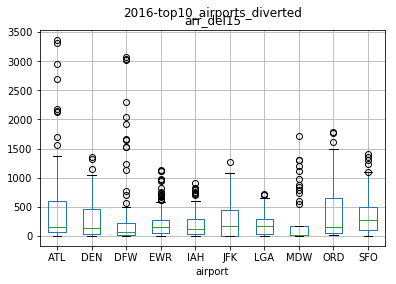

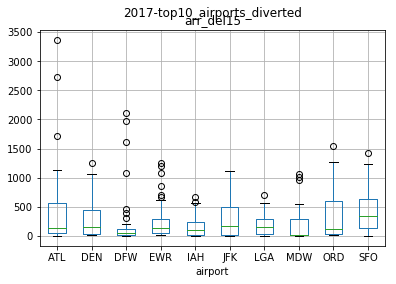

In [78]:
%matplotlib inline

from matplotlib import pyplot as plt


vars = locals()
top10s = [(v, vars[v]) for v in top10s_airports if isinstance(vars[v], pd.Series)]
for top10name, top10_airports in top10s:
    # get top 10 airports by cause
    dfx = delays[delays.airport.isin(top10_airports.index)]
    # get delays reported by month
    dfx.loc[:, 'value'] = dfx.loc[:, 'arr_del15'] #(dfx['arr_del15_pct'] * 100).fillna(0).astype(int)
    dfx.loc[:, 'name'] = dfx['airport']
    # aggregate by year
    for g, gdf in dfx.groupby('year'):
        gdf.boxplot('value', by='airport')
        plt.suptitle('{}-{}'.format(g, top10name))
        exp = gdf[['carrier', 'year', 'month', 'name', 'value']]
        exp.loc[:, 'groupid'] = exp.apply(lambda r: '{r.month}_{r.carrier}'.format(**locals()), axis=1)
        #exp.sort_values(['name']).to_csv('data/delays_{}_{}.csv'.format(g, top10name), index_label='index')

In [68]:
top10s

[('top10_airports',
  Index(['PIT', 'MSY', 'RDU', 'DTW', 'SAN', 'SLC', 'DEN', 'AUS', 'SJC', 'LAX'], dtype='object', name='airport')),
 ('top10_airports_weather', airport
  ATL    1612.578325
  CVG    1297.430676
  DFW    1237.888015
  ORD    1140.845301
  MDW     710.974805
  IAH     697.181818
  DAL     693.193548
  EWR     630.975916
  DEN     620.432384
  LGA     608.724590
  Name: weather_delay, dtype: float64),
 ('top10_airports_carrier', airport
  ATL    8690.900615
  ORD    6512.830361
  DFW    5688.708931
  LAX    4047.130586
  DEN    3863.662144
  IAH    3512.470145
  CVG    3287.248700
  JFK    3231.222999
  MSP    3072.232108
  SFO    3026.202633
  Name: carrier_delay, dtype: float64),
 ('top10_airports_flights', airport
  ATL    5568529.0
  ORD    4514837.0
  DFW    3874252.0
  DEN    3050760.0
  LAX    3050526.0
  IAH    2549271.0
  PHX    2514754.0
  LAS    2161721.0
  SFO    2058954.0
  DTW    1880535.0
  Name: arr_flights, dtype: float64),
 ('top10_airports_delays', air

In [52]:
x = locals()
[(v, x[v]) for v in top10s_carriers]

[('top10_carriers_carrier', carrier
  WN    3022.587209
  AA    2429.126428
  UA    1644.748844
  DL    1551.266976
  NW    1455.574049
  B6    1381.902555
  EV    1324.974356
  US    1281.610867
  OH    1094.707948
  HP    1076.281191
  Name: carrier_delay, dtype: float64), ('top10_carriers_weather', carrier
  OH    630.922336
  AA    502.450878
  WN    487.669951
  MQ    290.743125
  NW    290.263849
  EV    249.487867
  DL    222.857946
  CO    204.725431
  VX    200.321799
  UA    199.273520
  Name: weather_delay, dtype: float64), ('top10_carriers_security', carrier
  WN    28.878684
  CO    17.799826
  HP    15.369221
  TZ    14.063181
  VX    13.198962
  B6    12.912881
  AS    11.920792
  AA    10.483748
  US    10.419433
  RU    10.309869
  Name: security_delay, dtype: float64), ('top10_carriers_late_aircraft',
  carrier
  WN    6685.129916
  AA    2818.795974
  UA    2496.129634
  B6    1990.398684
  FL    1987.212940
  DH    1655.698908
  MQ    1568.432643
  US    1492.111194

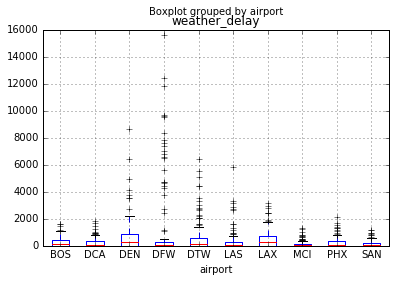

In [30]:
df[df.year == 2013].boxplot('weather_delay', 'airport')

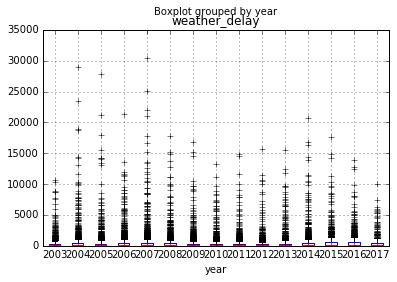

In [42]:
df[c('year,weather_delay')].boxplot('weather_delay', 'year')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135cf6fd0>]], dtype=object)

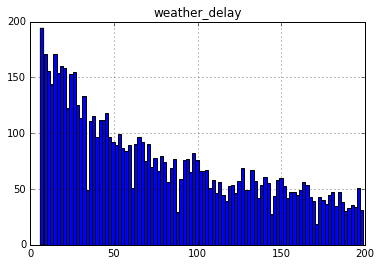

In [66]:
df[(df.weather_delay<200) & (df.weather_delay>5)].hist('weather_delay', bins=100)

In [14]:
top10_airports


Index([u'TKI', u'ENV', u'CKB', u'MKC', u'SKA', u'RCA', u'CBM', u'GLH', u'LBF',
       u'BFF'],
      dtype='object', name=u'airport')

In [229]:
df.groupby('airport').value.mean()

airport
BOS    21.170360
DCA    18.981541
DEN    20.351718
DFW    20.197594
DTW    21.488182
LAS    19.829045
LAX    21.037294
MCI    20.132715
PHX    19.748109
SAN    19.250675
Name: value, dtype: float64

In [182]:
delays[(delays.arr_del15_pct > 0.6) & (delays.airport == 'LAX')]

year  month carrier                 carrier_name airport  \
5462    2003     10      EV  Atlantic Southeast Airlines     LAX   
27389   2005      2      FL  AirTran Airways Corporation     LAX   
46014   2006      3      FL  AirTran Airways Corporation     LAX   
51947   2006      7      EV  Atlantic Southeast Airlines     LAX   
53454   2006      8      EV  Atlantic Southeast Airlines     LAX   
54991   2006      9      EV  Atlantic Southeast Airlines     LAX   
98204   2008     12      HA       Hawaiian Airlines Inc.     LAX   
163568  2012     12      F9       Frontier Airlines Inc.     LAX   
193919  2014     12      MQ                    Envoy Air     LAX   

                                      airport_name  arr_flights  arr_del15  \
5462    Los Angeles, CA: Los Angeles International          1.0        1.0   
27389   Los Angeles, CA: Los Angeles International        111.0       69.0   
46014   Los Angeles, CA: Los Angeles International         93.0       59.0   
51947   Los Angeles, CA: Los Angeles International         31.0       20.0   
53454   Los Angeles, CA: Los Angeles International         31.0       25.0   
54991   Los Angeles, CA: Los Angeles International          5.0        4.0   
98204   Los Angeles, CA: Los Angeles International         62.0       48.0   
163568  Los Angeles, CA: Los Angeles International        158.0       97.0   
193919  Los Angeles, CA: Los Angeles International         14.0        9.0   

        carrier_ct  weather_ct      ...        late_aircraft_ct  \
5462          0.00        0.00      ...                    0.00   
27389        21.77        0.00      ...                   14.83   
46014        15.78        0.00      ...                   14.56   
51947        12.50        0.00      ...                    0.00   
53454         4.11        0.00      ...                    0.00   
54991         2.35        0.00      ...                    0.00   
98204        43.94        0.00      ...                    4.06   
163568       29.91        0.49      ...                   14.49   
193919        0.17        2.08      ...                    6.29   

        arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
5462              0.0           0.0       57.0            0.0            0.0   
27389             0.0           0.0     2914.0          901.0            0.0   
46014             0.0           1.0     2749.0          665.0            0.0   
51947             0.0           0.0      597.0          405.0            0.0   
53454             0.0           0.0      881.0          127.0            0.0   
54991             0.0           0.0      136.0          108.0            0.0   
98204             0.0           0.0     2715.0         2308.0            0.0   
163568            0.0           0.0     4362.0         1542.0           24.0   
193919            4.0           0.0      714.0           14.0          160.0   

        nas_delay  security_delay  late_aircraft_delay  arr_del15_pct  
5462         57.0             0.0                  0.0       1.000000  
27389      1055.0             0.0                958.0       0.621622  
46014      1138.0             0.0                946.0       0.634409  
51947       192.0             0.0                  0.0       0.645161  
53454       754.0             0.0                  0.0       0.806452  
54991        28.0             0.0                  0.0       0.800000  
98204         0.0             0.0                407.0       0.774194  
163568     1946.0             0.0                850.0       0.613924  
193919       54.0             0.0                486.0       0.642857  

[9 rows x 22 columns]

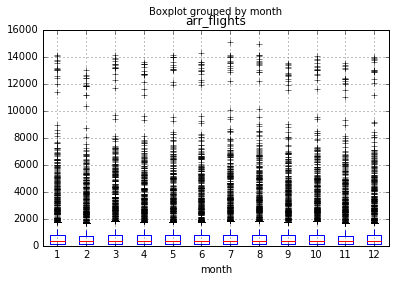

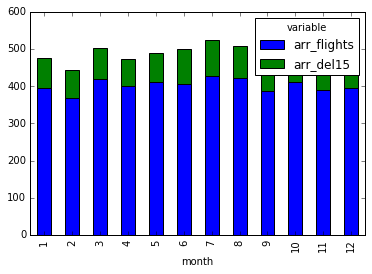

In [69]:
cols = c('month') 
rows = mdelays.variable.isin(c('arr_flights,arr_del15'))
dfx = mdelays[rows].groupby(cols + ['variable']).value.mean().reset_index()
dfx = pd.pivot_table(dfx, index=cols, columns='variable', values='value').reset_index()
dfx.plot.bar('month', c('arr_flights,arr_del15'), stacked=True)

In [75]:
mdelays.variable.unique()

array(['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'], dtype=object)

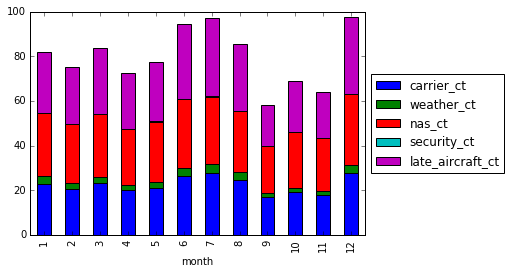

In [81]:
from matplotlib import pyplot as plt

c = lambda v : v.split(',')
cols = c('month') 
stats = [cn for cn in mdelays.variable.unique() if cn.endswith('_ct')]
rows = mdelays.variable.isin(stats)
dfx = mdelays[rows].groupby(cols + ['variable']).value.mean().reset_index()
dfx = pd.pivot_table(dfx, index=cols, columns='variable', values='value').reset_index()
dfx.plot.bar('month', stats, stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [11]:
delays.columns = [c.strip() for c in delays.columns]

In [86]:
import string
string.ascii_letters
string.printable
string.ascii_lowercase
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [93]:
string.digits + string.ascii_lowercase + string.ascii_uppercase

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [91]:
string.printable[:62]

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [120]:
import this
wisdom = [s for s in this.s.split('\n') 
         if 'cersrenoyl' in s][0].decode('rot13')
print(wisdom)

There should be one-- and preferably only one --obvious way to do it.


In [117]:
this.d

{'A': 'N',
 'B': 'O',
 'C': 'P',
 'D': 'Q',
 'E': 'R',
 'F': 'S',
 'G': 'T',
 'H': 'U',
 'I': 'V',
 'J': 'W',
 'K': 'X',
 'L': 'Y',
 'M': 'Z',
 'N': 'A',
 'O': 'B',
 'P': 'C',
 'Q': 'D',
 'R': 'E',
 'S': 'F',
 'T': 'G',
 'U': 'H',
 'V': 'I',
 'W': 'J',
 'X': 'K',
 'Y': 'L',
 'Z': 'M',
 'a': 'n',
 'b': 'o',
 'c': 'p',
 'd': 'q',
 'e': 'r',
 'f': 's',
 'g': 't',
 'h': 'u',
 'i': 'v',
 'j': 'w',
 'k': 'x',
 'l': 'y',
 'm': 'z',
 'n': 'a',
 'o': 'b',
 'p': 'c',
 'q': 'd',
 'r': 'e',
 's': 'f',
 't': 'g',
 'u': 'h',
 'v': 'i',
 'w': 'j',
 'x': 'k',
 'y': 'l',
 'z': 'm'}

In [138]:
df = pd.DataFrame({'id1':[1,1,1,1,2,2,2],'id2':[1,1,1,1,2,2,2],'value':['a','b','c','d','a','b','c']})
#pd.melt(df, id_vars=['id1', 'id2'], value_vars=['value'], )
pd.pivot_table(df, columns=['value'], index=['id1', 'id2'])


id1  id2 value
0    1    1     a
1    1    1     b
2    1    1     c
3    1    1     d
4    2    2     a
5    2    2     b
6    2    2     c